## Suche nach dem Higgs Boson des Standardmodells im $\mathrm{H} \rightarrow ZZ \rightarrow 4\ell$ Kanal.
---

Im Jahr 2012 wurde am CERN das bereits vor über vierzig Jahren vorhergesagte Higgs-Boson entdeckt, und damit wurde ein wichtiges Puzzlestück bestätigt, das unser Verständnis über das Universum im Kleinsten untermauert. Das Higgs-Boson kann erklären, wie die uns bekannten Teilchen ihre Masse erhalten.

Das Higgs-Boson hat eine mittlere Lebenszeit von $1.56\cdot 10^{-22}\,\mathrm{s}$, es ist damit ein sehr kurzlebigen Teilchen. Aufgrund dieser kurzen Lebensdauer kann das Higgs-Boson nicht direkt von unseren Detektoren beobachtet werden. Stattdessen können wir seine Existenz anhand der Zerfallsprodukte nachweisen. Wie ein Teilchen zerfällt, hängt davon ab, wie es mit anderen Teilchen interagiert. Das Higgs-Boson koppelt an die Masse der Teilchen und weist daher eine breite Palette von Zerfallsmöglichkeiten auf. Bei der Entdeckung des Higgs-Bosons war es von großer Bedeutung, viele dieser Zerfallsmöglichkeiten zu untersuchen, um beispielsweise alle vorhergesagten Eigenschaften überprüfen zu können.

Einen Hinweis auf die Existenz des Higgs-Bosons können wir auch erhalten, indem wir einen dieser untersuchten Zerfallskanäle genauer betrachten. In unserem gewählten Zerfallskanal zerfällt das Higgs-Boson zunächst in zwei Z-Bosonen, die wiederum in je zwei Leptonen zerfallen.

Die Z-Bosonen sind Elementarteilchen, die zur elektroschwachen Wechselwirkung gehören. Sie vermitteln den Austausch von schwacher Ladung zwischen Teilchen und spielen eine wichtige Rolle bei der Umwandlung von Teilchenarten in Kernreaktionen. Die Leptonen umfassen eine Familie von Teilchen, zu der das Elektron, das Muon und das Tau-Lepton gehören, zusammen mit ihren dazugehörigen Neutrinos. Da Neutrinos von unserem Detektor nicht direkt erfasst werden können, werden wir diese im Weiteren nicht betrachten. Ebenso werden wir die Tau-Leptonen nicht weiter betrachten, da diese instabil sind und früh zerfallen. Die Verfolgung dieser als Zwischenschritt bei der Suche nach dem Higgs-Boson würde den Rahmen sprengen. Daher beschränken wir uns auf die Elektronen und Muonen. Die Muonen sind zwar ebenfalls keine stabilen Teilchen, weisen jedoch im Gegensatz zu den Tau-Leptonen eine viel größere mittlere Lebensdauer auf, weshalb sie unseren Detektor vollständig durchqueren können.

---

Die Arbeitsmethode für dieses Notebook wird darin bestehen, dass wir es gemeinsam im Dialog bearbeiten. Es wird Abschnitte geben, in denen Ihr Informationen, weiterführende Erklärungen oder zusätzliche Beispiele von Euren Betreuern im Gespräch erhaltet. Im Anschluss daran werdet Ihr auch Abschnitte eigenständig oder in kleinen Gruppen bearbeiten - doch das bedeutet keineswegs, dass in dieser Zeit keine Fragen gestellt werden dürfen. Ganz im Gegenteil!

Unser Hauptaugenmerk wird auf den simulierten Datensätzen liegen, und am Ende werden wir uns mit den gemessenen Datensätzen befassen. Jeder dieser Datensätze enthält zahlreiche gespeicherte Kollisionsereignisse, die ausgewählte Informationen aus den entsprechenden Kollisionen zeilenweise auflisten. Genauere Details dazu werden im nächsten Abschnitt behandelt. Doch zuvor stellt sich die Frage:

> Warum verwenden wir eigentlich simulierte Daten und nicht gleich die gemessenen?

Das Ziel wird darin bestehen, die Empfindlichkeit für Signalereignisse zu erhöhen, indem wir in den simulierten Datensätzen ein hohes Verhältnis zwischen dem Untergrund und dem Signal erreichen. Dies werden wir durch das geschickte Filtern von Untergrundereignissen erreichen - im besten Fall nur von diesen -, während die Signalereignisse erhalten bleiben sollen.

> Ist eine solche Vorgehensweise überhaupt möglich?

Am Ende werden wir unsere Filtermethoden auf die tatsächlich durchgeführte Messung anwenden und untersuchen, ob wir einen signifikanten Überschuss an Ereignissen feststellen können, die wir dem Higgs-Boson zuschreiben können. Die Signifikanz dieses Überschusses werden wir auf einfache Weise quantifizieren.


---

In der folgenden Zelle importieren wir Bibliotheken und Hilfsfunktionen, die wir benötigen werden. Die Verwendung von bereits erstellten Bibliotheken und Funktionen anderer Entwickler spart Zeit und vermeidet das Schreiben redundanter Codes. Es ist daher gängige Praxis, Bibliotheken und Funktionen zu verwenden, die für die Entwicklung und Durchführung von Experimenten erforderlich sind. Allerdings, wenn eine Funktionalität nicht wie erwartet funktioniert oder keine passende Bibliothek verfügbar ist, führt kein Weg daran vorbei, eigene Implementierungen zu erstellen.

In [1]:
import pandas as pd  # Für die Manipulation von Daten in Tabellenform
from IPython.display import display  # Für die visualle Darstellung von DataFrames

import numpy as np  # Für die Berechnung von unterschiedlichen Größen

from pprint import pprint  # ggf. für eine schönere print-Ausgabe, pprint = (p)retty (print)
from copy import deepcopy # Für das Kopieren von Objekten

from utils import (
    # Hilfsfunktionen für die durchgeführte Rekonstruktion
    get_lepton_names_by_flavour,  # Gibt uns die Namen der Leptonen in einem Ereignis zurück, die einen bestimmten Flavour haben
    # Funktionssammlung an Filtern, die wir auf die Ereignisse anwenden können
    Filter,  # Sammlung von Filtern, auf die wir nach der Rekonstruktion Zugriff haben werden
    # Hilfsfunktionen für die Visualisierung 
    plot_masses,   # Visualisierung der invarianten Massen
    prev_hists, # Hilfsgröße für clear_hist_plots
    clear_hist_plots,  # Hifsfunktion zum Löschen der Histogramme die zwischengespeichert wurden
)

Als Nächstes laden wir die simulierten Datensätze für den Untergrund und das Signal. Das Signal wird in Form eines Higgs-Bosons mit einer Masse von $125\,\mathrm{GeV}/c^2$ angenommen.

> Warum genau $125\,\mathrm{GeV}/c^2$?

Die gemessenen Daten werden ebenfalls zur Vollständigkeit hochgeladen. Wir werden uns mit diesen aber erst zu einem späteren Zeitpunkt beschäftigen

In [2]:
dfs = pd.read_csv("data/MC_2012_H_to_ZZ_to_4L_[100,151].csv.gz", header=[0, 1])  # simulierte Signal Ereignisse
dfb = pd.read_csv("data/MC_2012_ZZ_to_4L_[100,151].csv.gz", header=[0, 1])  # simulierte Untergrund (background) Ereignisse

dfm = pd.read_csv("data/CMS_Run2012[B,C]_[100,151].csv.gz", header=[0, 1])  # gemessene Daten

print("simuliertes Signal")
display(dfs.head())

print("simulierter Untergrund")
display(dfb.head())

simuliertes Signal


event_information lepton_0                                            
            channel        E       px      py       pz flavour charge   
0                 2   40.520 -36.9470  14.478   8.1968     1.0    1.0  \
1                 0   45.575 -33.0500 -30.283   8.2250     0.0   -1.0   
2                 0   63.087 -23.3130  23.232  53.8220     0.0   -1.0   
3                 0   43.890   9.2923 -40.068  15.3150     0.0   -1.0   
4                 0   84.498 -28.3290 -17.593 -77.6390     0.0    1.0   

            lepton_1           ...  Z1      Z2             four_lep           
   relpfiso        E       px  ...  py  pz   E  px  py  pz        E  px  py   
0  0.107879   32.044 -10.1480  ... NaN NaN NaN NaN NaN NaN      NaN NaN NaN  \
1  0.008728   57.617   9.3309  ... NaN NaN NaN NaN NaN NaN      NaN NaN NaN   
2  0.083510   35.279  26.6930  ... NaN NaN NaN NaN NaN NaN      NaN NaN NaN   
3  0.019456   30.698 -21.0470  ... NaN NaN NaN NaN NaN NaN      NaN NaN NaN   
4  0.070871   33.163  30.6340  ... NaN NaN NaN NaN NaN NaN      NaN NaN NaN   

       
   pz  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  

[5 rows x 41 columns]

simulierter Untergrund


event_information lepton_0                                             
            channel        E      px       py        pz flavour charge   
0                 0  131.840  49.035 -24.0350 -120.0000     0.0   -1.0  \
1                 1  112.090  15.444 -28.5690 -107.2800     1.0   -1.0   
2                 0   51.086  12.700  40.9880  -27.7210     0.0   -1.0   
3                 0   41.822  41.330   6.2322   -1.4221     0.0   -1.0   
4                 2   56.155  34.641 -21.4060  -38.6670     1.0    1.0   

            lepton_1           ...  Z1      Z2             four_lep           
   relpfiso        E       px  ...  py  pz   E  px  py  pz        E  px  py   
0  0.113952   23.322  13.3900  ... NaN NaN NaN NaN NaN NaN      NaN NaN NaN  \
1  0.022230   25.031   4.5001  ... NaN NaN NaN NaN NaN NaN      NaN NaN NaN   
2  0.063375  111.560 -19.1620  ... NaN NaN NaN NaN NaN NaN      NaN NaN NaN   
3  0.015386   89.043 -27.6750  ... NaN NaN NaN NaN NaN NaN      NaN NaN NaN   
4  0.102327  165.820 -28.0560  ... NaN NaN NaN NaN NaN NaN      NaN NaN NaN   

       
   pz  
0 NaN  
1 NaN  
2 NaN  
3 NaN  
4 NaN  

[5 rows x 41 columns]

Die geladenen Datensätze enthalten immer jeweils vier Leptonen, die als `lepton_0`, `lepton_1`, `lepton_2` und `lepton_3` bezeichnet sind. Diese Leptonen sind die gemessenen Zerfallsprodukte und werden für die Rekonstruktion von Z-Boson-Kandidaten verwendet. Um auf die Leptonen in den Datensätzen zuzugreifen, können wir die Syntax `<dataframe>["lepton_0"]` verwenden, ähnlich wie bei nativen Python-Dictionaries.

In [3]:
dfs["lepton_0"]

,E,px,py,pz,flavour,charge,relpfiso
0,40.520,-36.9470,14.478,8.1968,1.0,1.0,0.107879
1,45.575,-33.0500,-30.283,8.2250,0.0,-1.0,0.008728
2,63.087,-23.3130,23.232,53.8220,0.0,-1.0,0.083510
3,43.890,9.2923,-40.068,15.3150,0.0,-1.0,0.019456
4,84.498,-28.3290,-17.593,-77.6390,0.0,1.0,0.070871
...,...,...,...,...,...,...,...
39930,66.947,9.1426,-57.832,-32.4620,1.0,-1.0,0.034332
39931,114.800,-9.7699,-45.499,-104.9500,0.0,-1.0,0.016650
39932,56.528,-36.9690,-25.133,34.5990,0.0,1.0,0.180502
39933,182.270,52.9680,-25.111,-172.5900,0.0,1.0,0.058888


Mit `dataframe["lepton_0"]["px"]` oder `dataframe[["lepton_0", "lepton_1"]]["px"]` kann auf spezifische Größen wie Impuls oder Energie der einzelnen (oder einer Gruppe an) Leptonen zugegriffen werden. Die Eigenschaft `"flavour"` unterscheidet zwischen Myonen (`0`) und Elektronen (`1`). Diese Unterscheidung und auch die Angabe der elektrischen Ladung `"charge"`, welche Teilchen-Antiteilchen kennzeichnet werden im Rekonstruktionsschritt und bei den späteren Filtern benötigt.

Die Größe `relpfiso` (relative Isolation des jeweiligen Teilchens) wird erst bei einem späteren Filterschritt benötigt und ist für die nachfolgende Rekonstruktion nicht erforderlich. Es ist gängig, alle benötigten Informationen zu Teilchen oder Ähnlichem in einem Datensatz zusammenzufassen oder in Echtzeit zu berechnen, um diese nicht später hinzufügen zu müssen.

Hier ist eine kleine Aufgabe zur Handhabung der Datensätze:

<div class="alert alert-info">
Zeige die Impulskomponente entlang der Z-Richtung (also die Impulskomponente entlang der Strahlachse) für das dritte und vierte Lepton im Datensatz an.

Verwende die Datensätze, die in der vorherigen Zelle geladen wurden.
Denke daran, dass die Indizierung in Python bei 0 beginnt, d.h. das erste Lepton hat den Index 0, das zweite den Index 1 usw.
Wenn du diesen Schritten folgst, solltest du in der Lage sein, die Impulskomponente entlang der Z-Richtung für das dritte und vierte Lepton aus dem Datensatz auszulesen.
</div>


In [4]:
# your code goes here
print(dfs["lepton_2"]["pz"])
print("---" * 10)
print(dfb["lepton_3"]["pz"])

0       -16.0510
1        -8.1017
2        13.7300
3        24.2040
4       -28.8570
          ...   
39930    11.2130
39931   -24.8700
39932    21.6830
39933   -83.5270
39934     5.9609
Name: pz, Length: 39935, dtype: float64
------------------------------
0         3.21370
1         8.59890
2         2.28850
3       -15.73000
4         0.18212
           ...   
66187    17.38900
66188     2.35850
66189     1.15930
66190     2.42770
66191    -6.81120
Name: pz, Length: 66192, dtype: float64


In den Datensätzen befindet sich, wie Du oben bereits gesehen hast, auch die Information zu den rekonstruierten Z-Bosonen (im Allgemeinen als Objekte bezeichnet) `"Z1"` und `"Z2"`. Diese Einträge werden die Kandidaten für die beiden von Dir rekonstruierten Z-Bosonen enthalten, die aus den Leptonen berechnet werden, welche in einem Ereignis vorhanden sind. Ebenfalls können wir, falls eine Rekonstruktion von den zwei Z-Bosonen möglich ist, auch die vier Leptonen (oder die zwei rekonstruierten Z-Bosonen) miteinander kombinieren (warum dürfen wir das?). Der daraus resultierende `"four_lep"` Eintrag enthält dann Kandidaten für das mögliche Higgs-Boson. Genau wie die Leptonen haben die Z-Bosonen und die Higgs-Kandidaten ebenfalls Energie- und Impulseinträge.

`"Z1"`, `"Z2"` und `"four_lep"` sind initial leer und mit `NaN`s (**N**ot **a** **N**umber) gefüllt. Im Rekonstruktionsschritt werden wir für jedes `"Z1"`, `"Z2"` und `"four_lep"` diese Größen berechnen und eintragen.

Ein Eintrag fehlt uns für die vollständige Beschreibung der Datensätze: `dataframe["event_informations"]["channel"]`. Diese Information unterscheidet zwischen den verschiedenen Zerfallskanälen. Es gibt den Kanal mit vier Leptonen gleichen Flavours, also entweder vier Myonen (`0`) oder vier Elektronen (`1`), und den Mischkanal mit zwei Myonen und zwei Elektronen (`2`). Diese Information ist relevant für die Rekonstruktion, da ein Z-Boson nur in ein Leptonen-Paar des gleichen Flavours zerfallen können. Daher muss dies bei der Rekonstruktion von Z-Bosonen-Kandidaten im Mischkanal berücksichtigt werden!


---

Bevor wir uns dem Rekonstruktionsprozess widmen, benötigen wir noch eine wichtige Größe, die im obigen Datensatz nicht enthalten ist, aber zentral für unsere Auswahl an Z-Bosonen sein wird. Diese Größe ist die invariante Masse, die aus den Impulsen und Energien der einzelnen Zerfallsprodukte oder des jeweiligen einzelnen Teilchens berechnet wird.

Die invariante Masse ist eine bedeutende Größe in der Teilchenphysik, da sie direkte Informationen liefert um welches Teilchen es sich handelt. Sie ist "invariant" in dem Sinne, dass sie unabhängig von der Wahl unseres Bezugssystems ist. Das bedeutet, dass die invariante Masse für dasselbe Teilchenpaar in verschiedenen Bezugssystemen immer denselben Wert haben wird!

Deshalb wird in der Praxis die invariante Masse zur Teilchenidentifikation verwendet. Hierbei werden die aus einem Zerfall entstandenen Teilchen für die Berechnung genutzt.

<div class="alert alert-info">

Wie ist die invariante Masse für ein Teilchen definiert?
Was ändert sich, wenn wir mehrere Teilchen für die Berechnung nutzen?

Implementiere die Berechnung der invarianten Masse für ein Teilchen in der folgenden `calculate_invariant_mass` Funktion.
</div>

In [5]:
# Berechnung der Invarianten Masse
def calculate_invariant_mass(energy, px, py, pz):
    mass_square = energy**2 - px**2 - py**2 - pz**2  # Quadrat der invarianten Masse

    try: # Für den Fall, dass es sich bei energy, px, py, pz jeweils nur um eine Zahl handelt:

        # Wenn mass_square < 0 ist, ist die Wurzel nicht definiert!
        # gebe in diesem Fall np.nan (not a number) zurück, ansonsten die Wurzel von mass_square
        return np.sqrt(mass_square) if mass_square >= 0 else np.nan
    except ValueError: # Für den Fall, dass es sich bei energy, px, py, pz jeweils um numpy arrays handelt

        # Im Falle von Arrays ist es einfacher alle Werte die kleiner als 0 sind entsprechend zu ersetzen
        negative_square_masses = mass_square < 0  # Finde alle negativen Werte
        mass_square[negative_square_masses] = np.nan  # Wähle alle negativen Werte aus und ersetze sie durch np.nan
        # Gebe die Wurzel von mass_square zurück
        
        return np.sqrt(mass_square)
    
# Mögliche Variablen für das Testen der Funktion. Um welches Teilchen könnte es sich handeln? 
particle_E = 97.5   # in GeV
particle_px = 7.8   # in GeV
particle_py = 32.5  # in GeV
particle_pz = 13.9  # in GeV

# Hier erwarten wir eine Zahl als Rückgabewert für die invariante Masse
print(calculate_invariant_mass(particle_E, particle_px, particle_py, particle_pz))

# Bei mehreren gebenen Teilchen (z.B. zwei Elektronen)
particle_E  = np.array([97.5, 48.4])   # in GeV
particle_px = np.array([7.8, 3.2])     # in GeV
particle_py = np.array([32.5, 21.7])   # in GeV
particle_pz = np.array([13.9,36.1])    # in GeV

# Hier erwarten wir ein Array als Rückgabewert für die invariante Masse
print(calculate_invariant_mass(particle_E, particle_px, particle_py, particle_pz))

# Bei mehreren gebenen Teilchen, welche in der Rekonstruktion kombiniert werden 
# können wir die Summe der Teilchen übergeben "np.sum()" oder "<array>.sum()" funktionieren für numpy arrays
print(calculate_invariant_mass(particle_E.sum(), particle_px.sum(), particle_py.sum(), particle_pz.sum()))

90.53148623545292
[90.53148624 23.62667983]
125.41200102063598


Deine Berechnung von der invarianten Masse wird zudem im weiteren Verlauf auch bei der Berechnung für die Darstellung der massenverteilungen verwendet. Hierfür werden wir die hilfsfunktion `plot_masses` verwenden. `plot_masses?` nutz hierzu eine der Funktion übergebene Berechnungsanweidung der invarianten Masse. In unserem Fall wird es die von Dir implementierte Funktion `calculate_invariant_mass` sein. Um die nicht ständig diese Funktion übergeben zu müssen setzen wir diese als den "default" Eintrag einmal fest. Dies können wir mithilfe von `partial` aus der Python-Standardbibliothek realisieren: 

---

Deine Berechnung der invarianten Masse wird zudem im weiteren Verlauf auch bei der Berechnung für die Darstellung der Massenverteilungen verwendet werden. Hierfür nutzen wir die Hilfsfunktion `plot_masses`. Diese nutzt hierzu eine der Funktion übergebene Berechnungsanweisung der invarianten Masse. In unserem Fall wird es die von Dir implementierte Funktion `calculate_invariant_mass` sein. Um die Funktion nicht ständig übergeben zu müssen, setzen wir diese als den "default" Eintrag einmal fest. Dies können wir mithilfe von `partial` aus der Python-Standardbibliothek realisieren.


In [6]:
# Hier ist `massfunction: Callable` noch nicht gesetzt und eine erforderliche Größe die übergeben werden muss.
# Das Callable nach ":" gibt nur einen Hinweis darauf, dass es sich um eine Funktion oder etwas was wie eine Funktion verhält handelt.
plot_masses?

Signature:
plot_masses(
    df: pandas.core.frame.DataFrame,
    mass_function: Callable,
    filter_name: str = '',
    z1_bins: int = 100,
    z2_bins: int = 100,
    four_lep_bins: int = 100,
    z1_range: Tuple[float, float] = (0, 139),
    z2_range: Tuple[float, float] = (0, 79),
    four_lep_range: Tuple[float, float] = (100, 149),
    yscale: str = 'symlog',
    show_z1_and_z2_mass: bool = True,
    yedge: Union[NoneType, float, int] = None,
    xdim: Union[int, float] = 14,
    ydim: Union[int, float] = 3,
    title: Optional[str] = None,
    show_plot: bool = True,
) -> pandas.core.frame.DataFrame
Docstring: <no docstring>
File:      ~/Documents/GitHub/Higgs-Search-as-a-Masterclass/utils.py
Type:      function

In [7]:
from functools import partial  # Hilfswerkzeug aus der Standardbibliothek um Funktionen zu erweitern
plot_masses = partial(plot_masses, mass_function=calculate_invariant_mass)

Der nun von uns gesetzte default-Wert für `mass_function` sollte nun die Funktion `calculate_invariant_mass` sein.

In [8]:
# mass_function sollte nun einen Defaultwert - die Funktion "calculate_invariant_mass" haben.
plot_masses?

Signature:     
plot_masses(
    df: pandas.core.frame.DataFrame,
    *,
    mass_function: Callable = <function calculate_invariant_mass at 0x7feb601d2e60>,
    filter_name: str = '',
    z1_bins: int = 100,
    z2_bins: int = 100,
    four_lep_bins: int = 100,
    z1_range: Tuple[float, float] = (0, 139),
    z2_range: Tuple[float, float] = (0, 79),
    four_lep_range: Tuple[float, float] = (100, 149),
    yscale: str = 'symlog',
    show_z1_and_z2_mass: bool = True,
    yedge: Union[NoneType, float, int] = None,
    xdim: Union[int, float] = 14,
    ydim: Union[int, float] = 3,
    title: Optional[str] = None,
    show_plot: bool = True,
) -> pandas.core.frame.DataFrame
Call signature: plot_masses(*args, **kwargs)
Type:           partial
String form:    functools.partial(<function plot_masses at 0x7feb1e8c6b00>, mass_function=<function calculate_invariant_mass at 0x7feb601d2e60>)
File:           /usr/lib/python3.10/functools.py
Docstring:     
partial(func, *args, **keywords) - new 

---

Als nächstes kommt der eigentliche Rekonstruktionsschritt. Die Motivation hinter der Vorgehensweise werden wir an der Tafel besprechen und in einzelnen Schritten für ein einzelnes Event verstehen. Danach fassen wir alles in der Funktion `perform_reconstruction` zusammen und führen die Rekonstruktion auf den gesamten Datensätzen aus.

Starten wir hierzu mit einem einzelnen Event der vier Leptonen gleichen Flavours (Myonen) enthält:

In [9]:
i = 0
event = deepcopy(dfb.iloc[i]) 
# Wir kopieren das Event, damit unsere Tests nicht das Original verändern
# Wir werden diesen und alle anderen Events entsprechend verändern, 
# sobald wir die Rekonstruktionslogik vollständig implementiert haben
display(event)

event_information  channel       0.000000
lepton_0           E           131.840000
                   px           49.035000
                   py          -24.035000
                   pz         -120.000000
                   flavour       0.000000
                   charge       -1.000000
                   relpfiso      0.113952
lepton_1           E            23.322000
                   px           13.390000
                   py           15.658000
                   pz           10.929000
                   flavour       0.000000
                   charge        1.000000
                   relpfiso      0.198953
lepton_2           E            18.441000
                   px            6.304800
                   py           -5.315100
                   pz           16.494000
                   flavour       0.000000
                   charge        1.000000
                   relpfiso      0.168659
lepton_3           E             5.491200
                   px           -2

<div class="alert alert-info">

Wenn wir nun die beiden Z-Bosonen rekonstruieren wollen, welche Kombination an Leptonen kommen in Frage? Handelt es sich um dieselbe Kombination an Leptonen oder ändert sie sich zwischen den Ereignissen? Du kannst dies überprüfen, indem Du die Variable `i` in der oberen Zeile variierst. Stelle danach `i` wieder auf den ursprünglichen Wert zurück.

</div>


Da wir in der Regel nicht davon ausgehen können, dass die Leptonen mit der richtigen elektrischen Ladung immer in der von uns gewünschten Reihenfolge vorliegen, probieren wir alle möglichen zweier-Kombinationen aus, die aus den vier Leptonen gebildet werden können.

<div class="alert alert-info">

Ergänze die Liste der möglichen zweier-Kombinationen, die aus der Menge `["lepton_0", "lepton_1", "lepton_2", "lepton_3"]` gebildet werden können.

</div>


In [10]:
possible_lepton_pair_combinations = [
    ("lepton_0", "lepton_1"),
    ("lepton_0", "lepton_2"),
    # Ergänze hier die fehlenden Kombinationen
    ("lepton_0", "lepton_3"),
    ("lepton_1", "lepton_2"),
    ("lepton_1", "lepton_3"),
    ("lepton_2", "lepton_3"),
]

Wir können nun über diese Sammlung an Kombinationen mit einem `for` Loop iterieren:

In [11]:
for first_lepton_name, second_lepton_name in possible_lepton_pair_combinations:
    print(f"Kombination: {first_lepton_name}, {second_lepton_name}")

Kombination: lepton_0, lepton_1
Kombination: lepton_0, lepton_2
Kombination: lepton_0, lepton_3
Kombination: lepton_1, lepton_2
Kombination: lepton_1, lepton_3
Kombination: lepton_2, lepton_3


In `possible_lepton_pair_combination` befinden sich die Namen der Leptonen, die verwendet werden können, um auf einzelne Leptonen und ihre Eigenschaften im ausgewählten Ereignis zuzugreifen:

In [12]:
for first_lepton_name, second_lepton_name in possible_lepton_pair_combinations:
    first_lepton, second_lepton = event[first_lepton_name], event[second_lepton_name]

    print("---" * 10)
    print(f"{first_lepton_name} hat die folgenden Größen:")
    print(first_lepton)
    print("---" * 10)
    print(f"{second_lepton_name} hat die folgenden Größen:")
    print(second_lepton)
    print("---" * 10)

    break # Nur die erste Kombination ausgeben (zur Demonstration)

------------------------------
lepton_0 hat die folgenden Größen:
E           131.840000
px           49.035000
py          -24.035000
pz         -120.000000
flavour       0.000000
charge       -1.000000
relpfiso      0.113952
Name: 0, dtype: float64
------------------------------
lepton_1 hat die folgenden Größen:
E           23.322000
px          13.390000
py          15.658000
pz          10.929000
flavour      0.000000
charge       1.000000
relpfiso     0.198953
Name: 0, dtype: float64
------------------------------


Insbesondere können wir auch auf einzelne Größen wie die Ladung (`"charge"`), die Energie `"E"` und die einzelnen Impulskomponenten (`"px"`, `"py"`, `"pz"`) zugreifen:

In [13]:
for first_lepton_name, second_lepton_name in possible_lepton_pair_combinations:
    first_lepton, second_lepton = event[first_lepton_name], event[second_lepton_name]

    print(f"Summe der Ladungen von {first_lepton_name} und {second_lepton_name}: {first_lepton['charge'] + second_lepton['charge']}")
    print(f"Summe der Energien von {first_lepton_name} und {second_lepton_name}: {first_lepton['E'] + second_lepton['E']}")
    print("---" * 10)

Summe der Ladungen von lepton_0 und lepton_1: 0.0
Summe der Energien von lepton_0 und lepton_1: 155.162
------------------------------
Summe der Ladungen von lepton_0 und lepton_2: 0.0
Summe der Energien von lepton_0 und lepton_2: 150.281
------------------------------
Summe der Ladungen von lepton_0 und lepton_3: -2.0
Summe der Energien von lepton_0 und lepton_3: 137.3312
------------------------------
Summe der Ladungen von lepton_1 und lepton_2: 2.0
Summe der Energien von lepton_1 und lepton_2: 41.763
------------------------------
Summe der Ladungen von lepton_1 und lepton_3: 0.0
Summe der Energien von lepton_1 und lepton_3: 28.8132
------------------------------
Summe der Ladungen von lepton_2 und lepton_3: 0.0
Summe der Energien von lepton_2 und lepton_3: 23.932199999999998
------------------------------


Damit sollte es Dir möglich sein die invariante Masse eines Leptonen-Paares zu bestimmen, welche eine kombinierte Elektrische Ladung von $0$ aufweist. Diese Kombinatioen entsprechen den Z-Boson-Kandidaten, welche wir für `"Z1"` oder `"Z2"` setzten werden. Wir speichern alle solche Kandidaten in einem Python `dict` bevor wir eine abschließende Wahl in den nächsten Schritten treffen werden.

In [14]:
z_boson_candidates = {}
for first_lepton_name, second_lepton_name in possible_lepton_pair_combinations:
    first_lepton, second_lepton = event[first_lepton_name], event[second_lepton_name]

    if first_lepton.charge + second_lepton.charge == 0:  # Bedingung, welche prüft ob die kombinierte Ladung der beiden Leptonen 0 ist
        px = first_lepton.px + second_lepton.px  # Die Summe der x-Komponenten des Impulses der beiden Leptonen
        py = first_lepton.py + second_lepton.py  # Analog für die y-Komponente
        pz = first_lepton.pz + second_lepton.pz  # Analog für die z-Komponente
        E = first_lepton.E + second_lepton.E # Analog für die Energie

        M = calculate_invariant_mass(E, px, py, pz)  # Invariante Masse der beiden Leptonen, die du aus den oben berechneten Größen berechnet hast

        z_boson_candidates[
            (first_lepton_name, second_lepton_name)  # Schlüssel aus beiden Leptonen für die Z-Boson Kandidaten für den späteren Zugriff
        ] = {
            "px": px, "py": py, "pz": pz, "E": E, "M": M  # Speichere die berechneten Größen von diesem Leptonen-Paar in einem Dictionary
        }

pprint(z_boson_candidates)  # Ausgabe mit pprint, damit die Ausgabe übersichtlicher ist. Du kannst es auch mit print(z_boson_candidates) vergleichen ;)

{('lepton_0', 'lepton_1'): {'E': 155.162,
                            'M': 90.61847741492905,
                            'px': 62.425,
                            'py': -8.377,
                            'pz': -109.071},
 ('lepton_0', 'lepton_2'): {'E': 150.281,
                            'M': 89.14575195122876,
                            'px': 55.3398,
                            'py': -29.3501,
                            'pz': -103.506},
 ('lepton_1', 'lepton_3'): {'E': 28.8132,
                            'M': 19.091319767108818,
                            'px': 11.3459,
                            'py': 11.7037,
                            'pz': 14.1427},
 ('lepton_2', 'lepton_3'): {'E': 23.932199999999998,
                            'M': 8.959989771199517,
                            'px': 4.2607,
                            'py': -9.269400000000001,
                            'pz': 19.7077}}


Jetzt, da wir mögliche Z-Boson Kandidaten haben, können wir auswählen, welche wir als `"Z1"` und welche als `"Z2"` zuordnen möchten.

> Frage: Wie groß wird unsere Auswahl an Z-Boson Kandidaten für "Z2" sein, wenn wir einen Kandidaten für "Z1" gewählt haben?

Bei der Wahl des ersten Z-Bosons `"Z1"` nehmen wir den Kandidaten aus unserer Sammlung, der der nominellen Z-Boson Masse von $91.1876\,\mathrm{GeV}/c^2$ am nächsten liegt. Hierzu benötigen wir die nominelle Z-Boson Masse `z_mass`, eine Variable `best_z1_candidate_key`, die den Schlüssel aus den beiden Leptonen speichert, und eine temporäre Variable `mass_distance_of_best_z1_candidate_to_z_mass`, die den Abstand zur nominellen Z-Boson Masse festhält.

Im nächsten Schritt durchlaufen wir alle gespeicherten Kandidaten in `z_boson_candidates` und berechnen den Abstand zwischen der nominellen Z-Boson Masse und der Z-Boson Masse des jeweiligen Kandidaten. Wenn dieser Abstand kleiner ist als der bisher beste beobachtete Abstand, ersetzen wir die bisherigen Werte von `best_z1_candidate_key` und `mass_distance_of_best_z1_candidate_to_z_mass` durch die neuen Werte. Am Ende der Schleife sollten wir den Kandidaten gefunden haben, dessen Masse der nominellen Z-Boson Masse am nächsten liegt.


In [15]:
z_mass = 91.1876  # GeV
best_z1_candidate_key = None  # Wird später mit dem Schlüssel (first_lepton, second_lepton) des besten Z1-Kandidaten belegt
mass_distance_of_best_z1_candidate_to_z_mass = float('inf')  # Wird später mit der Differenz des invarianten Masses des besten Z1-Kandidaten zur nominellen Z-Masse belegt

for key, z_boson_information in z_boson_candidates.items():
    # Die von dir zuvor gespeicherten Informationen von einem Z-Boson kannst du hier via z_boson_information['M'] usw. abrufen
    mass_distance_of_candidate_to_z_mass = float('inf')  # Berechne den Abstand der invarianten Masse des Z1-Kandidaten zur nominellen Z-Masse

    # Abfrage, ob der Massenabstand des aktuellen Kandidaten kleiner ist als der des besten Kandidaten
    if abs(z_boson_information['M'] - z_mass) < mass_distance_of_best_z1_candidate_to_z_mass:
        # Setze den Schlüssel des besten Z1-Kandidaten auf den Schlüssel des aktuellen Kandidaten
        best_z1_candidate_key = key  
        # Setze den Massenabstand des besten Z1-Kandidaten auf den Massenabstand des aktuellen Kandidaten
        mass_distance_of_best_z1_candidate_to_z_mass = abs(z_boson_information['M'] - z_mass)  

print(f"Bester Z1 Kandidat: {best_z1_candidate_key} mit den folgenden Informationen:")
pprint(z_boson_candidates[best_z1_candidate_key])

Bester Z1 Kandidat: ('lepton_0', 'lepton_1') mit den folgenden Informationen:
{'E': 155.162,
 'M': 90.61847741492905,
 'px': 62.425,
 'py': -8.377,
 'pz': -109.071}


Jetzt da wir den besten Kandidaten für `"Z1"` ausgewählt und haben können wir die Information über die Energie und die Impulse in unser ausgewähltes Ereignis eintragen:

In [16]:
event.loc["Z1", "E"] = z_boson_candidates[best_z1_candidate_key]["E"]
event.loc["Z1", "px"] = z_boson_candidates[best_z1_candidate_key]["px"]
event.loc["Z1", "py"] = z_boson_candidates[best_z1_candidate_key]["py"]
event.loc["Z1", "pz"] = z_boson_candidates[best_z1_candidate_key]["pz"]
display(event)

event_information  channel       0.000000
lepton_0           E           131.840000
                   px           49.035000
                   py          -24.035000
                   pz         -120.000000
                   flavour       0.000000
                   charge       -1.000000
                   relpfiso      0.113952
lepton_1           E            23.322000
                   px           13.390000
                   py           15.658000
                   pz           10.929000
                   flavour       0.000000
                   charge        1.000000
                   relpfiso      0.198953
lepton_2           E            18.441000
                   px            6.304800
                   py           -5.315100
                   pz           16.494000
                   flavour       0.000000
                   charge        1.000000
                   relpfiso      0.168659
lepton_3           E             5.491200
                   px           -2

Es fehlt nur noch `"Z2"` und `"four_lep"`. Bevor wir mit `"Z2"` weitermachen, müssen wir unsere aktuelle Sammlung an Z-Boson Kandidaten bereinigen. Hierzu müssen wir `best_z1_candidate_key` entfernen und alle Kandidaten entfernen, die eines der in `best_z1_candidate_key` verwendeten Leptonen nutzen.


In [17]:
# list() macht eine Kopie die für unsere Zwecke notwendig ist
# da wir Einträge aus z_boson_candidates löschen, würde sonst die Schleife nicht funktionieren
# Der Grund ist, dass Python es nicht erlaubt über ein Dictionary zu iterieren und gleichzeitig dieses zu verändern!

first_lepton_name_of_z1, second_lepton_name_of_z1 = best_z1_candidate_key
for key in list(z_boson_candidates.keys()):
    is_same = key == best_z1_candidate_key # Der für Z1 ausgewählte Kandidat entspricht dem aktuellen Kandidaten

    contains_one_of_the_leptons = first_lepton_name_of_z1 in key or second_lepton_name_of_z1 in key  # DELME

    if is_same or contains_one_of_the_leptons:  
        z_boson_candidates.pop(key)  # Lösche den Kandidaten aus der Sammlung
        print(f"{key} aus der Sammlung entfernt")

print(f"Verbleibende Kandidaten:")
pprint(z_boson_candidates)


('lepton_0', 'lepton_1') aus der Sammlung entfernt
('lepton_0', 'lepton_2') aus der Sammlung entfernt
('lepton_1', 'lepton_3') aus der Sammlung entfernt
Verbleibende Kandidaten:
{('lepton_2', 'lepton_3'): {'E': 23.932199999999998,
                            'M': 8.959989771199517,
                            'px': 4.2607,
                            'py': -9.269400000000001,
                            'pz': 19.7077}}


Es bleibt also genau ein Kandidat übrig! Wir können diesen also direkt auswählen und in unser ausgewähltes Ereignis eintragen. Da sich aber die Leptonennamen im anderen Event ändern könnten, erstellen wir die Variable über `list(z_boson_candidates.keys())[0]`, wobei `.keys()` uns immer alle Schlüssel in einem Dictionary ausgibt, die wir über `list()` in eine Liste umwandeln. Auf das erste (und das einzige Element) dieser Liste können wir mit `[0]` zugreifen.

In [18]:
remaining_z_boson_candidate_keys = list(z_boson_candidates.keys())  # Liste aller verbleibenden Z-Kandidaten
assert len(remaining_z_boson_candidate_keys) == 1, "Something went wrong!"  # Es sollte nur noch ein Z-Kandidat übrig sein
best_z2_candidate_key = remaining_z_boson_candidate_keys[0]  # Explizite Zuweisung des letzten verbleibenden Z-Kandidaten

# Dieser Abschnitt ist analog zu der Zuweisuung des Z1-Kandidaten
event.loc["Z2", "E"] = z_boson_candidates[best_z2_candidate_key]["E"]
event.loc["Z2", "px"] = z_boson_candidates[best_z2_candidate_key]["px"]
event.loc["Z2", "py"] = z_boson_candidates[best_z2_candidate_key]["py"]
event.loc["Z2", "pz"] = z_boson_candidates[best_z2_candidate_key]["pz"]

display(event)

event_information  channel       0.000000
lepton_0           E           131.840000
                   px           49.035000
                   py          -24.035000
                   pz         -120.000000
                   flavour       0.000000
                   charge       -1.000000
                   relpfiso      0.113952
lepton_1           E            23.322000
                   px           13.390000
                   py           15.658000
                   pz           10.929000
                   flavour       0.000000
                   charge        1.000000
                   relpfiso      0.198953
lepton_2           E            18.441000
                   px            6.304800
                   py           -5.315100
                   pz           16.494000
                   flavour       0.000000
                   charge        1.000000
                   relpfiso      0.168659
lepton_3           E             5.491200
                   px           -2

Für das `"four_lep"` Objekt hast Du die Wahl, entweder die Energie und Impulskomponenten der vier Leptonen oder der beiden rekonstruierten Z-Bosonen zu nutzen:

In [19]:
# Ersetze np.nan durch die Summe der einzelnen Komponenten der vier Leptonen oder der beiden Z-Bosonen

event.loc["Z2", "E"] = np.nan
event.loc["Z2", "px"] = np.nan
event.loc["Z2", "py"] = np.nan
event.loc["Z2", "pz"] = np.nan

display(event)

event_information  channel       0.000000
lepton_0           E           131.840000
                   px           49.035000
                   py          -24.035000
                   pz         -120.000000
                   flavour       0.000000
                   charge       -1.000000
                   relpfiso      0.113952
lepton_1           E            23.322000
                   px           13.390000
                   py           15.658000
                   pz           10.929000
                   flavour       0.000000
                   charge        1.000000
                   relpfiso      0.198953
lepton_2           E            18.441000
                   px            6.304800
                   py           -5.315100
                   pz           16.494000
                   flavour       0.000000
                   charge        1.000000
                   relpfiso      0.168659
lepton_3           E             5.491200
                   px           -2

Damit haben wir alle Größen im Ereignis erfolgreich ergänzt und könnten nun zum nächsten Ereignis übergehen. Dies werden wir in Form einer Funktion umsetzen, in die Du die von Dir bereits implementierte Logik aus den obigen Zellen einfügst. In dieser Funktion werden wir alle Ereignisse im Datensatz durchgehen.

Anmerkung: Wir haben den Zerfallskanal besprochen, bei dem die beiden Z-Bosonen in Leptonen derselben Familie zerfallen. Der Fall, bei dem ein Z-Boson in Myonen und das andere Z-Boson in Elektronen zerfällt, ist argumentativ ähnlich und unterscheidet sich nur in der Erstellung möglicher Leptonenpaare. Um es nicht zu kompliziert zu machen, habe ich den Abschnitt, der diese Unterscheidung vornimmt in die Funktion bereits hinzugefügt. Wenn es hierzu Fragen geben sollte: nur zu!

In [20]:
from tqdm import tqdm  # Für eine Fortschrittsanzeige
import time  # Für die Zeitmessung

def perform_reconstruction(df, remove_nans=True):

    z_mass = 91.1876  # Die Masse des Z-Bosons in GeV/c^2
    loop_timer = time.time()  # Starte die Zeitmessung

    # Schleife über jedes Ereignis im DataFrame unter Verwendung der tqdm-Bibliothek zur Fortschrittsanzeige
    for i, event in tqdm(enumerate(df.iloc()), total=df.shape[0]):

        # Hier bestimmen wir alle möglichen Leptonenpaare
        
        if event.event_information.channel == 2:  # Wenn das Ereignis im Misch-Kanal ist:
            first_muon_name, second_muon_name = get_lepton_names_by_flavour(event, flavour=0)  # Leptonen die Myonen entsprechen
            first_electron_name, second_electron_name = get_lepton_names_by_flavour(event, flavour=1)  # Leptonen die Elektronen entsprechen
            lepton_pairs = [(first_muon_name, second_muon_name), (first_electron_name, second_electron_name)]
        else: # Wenn das Ereignis nur Elektronen/Myonen hat:
             # Die Kombinationen hast Du bereits in der vorherigen Abschnitt festgelegt, keine Notwendigkeit es hier nochmal zu tun
            lepton_pairs = possible_lepton_pair_combinations

        # Hier bestimmen wir alle möglichen Z-Boson Kandidaten

        # Du kannst hierfür den Code aus dem vorherigen Abschnitt verwenden und hier einfügen
        
        z_boson_candidates = {}
        for first_lepton_name, second_lepton_name in lepton_pairs:
            first_lepton, second_lepton = event[first_lepton_name], event[second_lepton_name]

            if first_lepton.charge + second_lepton.charge == 0:  # Bedingung, welche prüft ob die kombinierte Ladung der beiden Leptonen 0 ist
                px = first_lepton.px + second_lepton.px  # Die Summe der x-Komponenten des Impulses der beiden Leptonen
                py = first_lepton.py + second_lepton.py  # Analog für die y-Komponente
                pz = first_lepton.pz + second_lepton.pz  # Analog für die z-Komponente
                E = first_lepton.E + second_lepton.E # Analog für die Energie

                M = calculate_invariant_mass(E, px, py, pz)  # Invariante Masse der beiden Leptonen, die du aus den oben berechneten Größen

                z_boson_candidates[
                    (first_lepton_name, second_lepton_name)  # Einzigartiger Schlüssel aus beiden Leptonen für die Z-Boson kandidaten
                ] = {
                    "px": px, "py": py, "pz": pz, "E": E, "M": M  # Speichere die berechneten Größen von diesem Leptonen-Paar in einem Dictionary
                }

        # In unserem Beispiel hatten wir ein Ereignis wo zwei Z-Boson Kandidaten gefunden wurden
        if len(z_boson_candidates) < 2:  # Für den Fall, dass weniger als zwei Z-Boson Kandidaten gefunden wurden
            continue  # Springe zum nächsten Ereignis, da eine Rekonstruktion nicht möglich ist
            # Alle "Z1", "Z2" und "four_lep" Werte bleiben NaN. Die Ereignisse werden später aus dem Datensatz entfernt


        # Hir wählen wir den Z-Boson Kandidaten, welcher am nächsten bei der Z-Bosonen Masse ist

        # Du kannst hierfür den Code aus dem vorherigen Abschnitt verwenden und hier einfügen
        # Die nominelle Z-Boson Masse ("z_mass") ist bereits im vorherigen Abschnitt global definiert worden, keine Notwendigkeit es hier nochmal zu tun

        best_z1_candidate_key = None  # Hier wird das Leptonen-Paar mit dem besten Z1-Kandidat gespeichert
        mass_distance_of_best_z1_candidate_to_z_mass = float('inf')  # kleinste Differenz des invarianten Massen
        for key, z_boson_information in z_boson_candidates.items():
            # Die von dir zuvor gespeicherten Informationen von einem Z-Boson kannst du hier via z_boson_information['M'] usw. abrufen
            
            if abs(z_boson_information['M'] - z_mass) < mass_distance_of_best_z1_candidate_to_z_mass:
                best_z1_candidate_key = key
                mass_distance_of_best_z1_candidate_to_z_mass = abs(z_boson_information['M'] - z_mass)

        # Da wir ein Event in unserem Datensatz modifizieren wollen müssen wir df.loc[<Ereignis>, <Spalte>] verwenden
        # In dem vorherigen Fall hatten wir nur ein Ereignis, welches wir modifizieren wollten, daher mussten wir
        # nicht event[0, <Spalte>] verwendet.
        df.loc[i, ("Z1", "E")] = z_boson_candidates[best_z1_candidate_key]["E"]
        df.loc[i, ("Z1", "px")] = z_boson_candidates[best_z1_candidate_key]["px"]
        df.loc[i, ("Z1", "py")] = z_boson_candidates[best_z1_candidate_key]["py"]
        df.loc[i, ("Z1", "pz")] = z_boson_candidates[best_z1_candidate_key]["pz"]

        # Hier werden alle Kombinationen, welche eines (oder beide) der Leptonen von best_z1_candidate_key beinhalten entfernt

        # Du kannst hierfür den Code aus dem vorherigen Abschnitt verwenden und hier einfügen

        first_lepton_name_of_z1, second_lepton_name_of_z1 = best_z1_candidate_key
        for key in list(z_boson_candidates.keys()):
            is_same = key == best_z1_candidate_key # Der für Z1 ausgewählte Kandidat entspricht dem aktuellen Kandidaten

            contains_one_of_the_leptons = first_lepton_name_of_z1 in key or second_lepton_name_of_z1 in key  # DELME

            if is_same or contains_one_of_the_leptons:  
                z_boson_candidates.pop(key)  # Lösche den Kandidaten aus der Sammlung

        remaining_z_boson_candidate_keys = list(z_boson_candidates.keys())  # Liste aller verbleibenden Z-Kandidaten
        assert len(remaining_z_boson_candidate_keys) == 1, "Something went wrong!"  # Es sollte nur noch ein Z-Kandidat übrig sein
        best_z2_candidate_key = remaining_z_boson_candidate_keys[0]  # Explizite Zuweisung des letzten verbleibenden Z-Kandidaten

        # Analog zu der obigen Zuweisung des Z1-Kandidaten
        df.loc[i, ("Z2", "E")] = z_boson_candidates[best_z2_candidate_key]["E"]
        df.loc[i, ("Z2", "px")] = z_boson_candidates[best_z2_candidate_key]["px"]
        df.loc[i, ("Z2", "py")] = z_boson_candidates[best_z2_candidate_key]["py"]
        df.loc[i, ("Z2", "pz")] = z_boson_candidates[best_z2_candidate_key]["pz"]

    print(f"Die Rekonstruktion, welche eine Schleife benutzt benötigte {time.time() - loop_timer} Sekunden")

    # Es fehlen uns noch die Higgs Boson Kandidaten, welche aus den beiden Z-Boson Kandidaten bestehen die wir in "four_lep" eintragen müssen:

    vectorized_timer = time.time()

    # Sollten beide Z-Boson Kandidaten existieren, dann werden die Energie und Impulskomponenten von
    # den beiden Z-Boson Kandidaten kombiniert und Higgs Boson Kandidaten bestehend aus vier Leptonen bestimmt.
    # Da hier keine Kombinatorik notwendig, ist können wir die Addition Spaltenweise durchführen, was deutlich schneller
    # ist als der vorher durchgeführte Loop

    df.loc[:, ("four_lep", "E")] = df.loc[:, ("Z1", "E")] + df.loc[:, ("Z2", "E")]
    df.loc[:, ("four_lep", "px")] = df.loc[:, ("Z1", "px")] + df.loc[:, ("Z2", "px")]
    df.loc[:, ("four_lep", "py")] = df.loc[:, ("Z1", "py")] + df.loc[:, ("Z2", "py")]
    df.loc[:, ("four_lep", "pz")] = df.loc[:, ("Z1", "pz")] + df.loc[:, ("Z2", "pz")]

    print(f"Die Rekonstruktion, welche Spaltenweise die Größen berechnete benötigte {time.time() - vectorized_timer} Sekunden")

    # Die Rekonstruktion der beiden Z-Bosonen kann auch Vektoriell erfolgen und würde die Rekonstruktion nochmals beschleunigen
    # Leider ist dies nicht so einfach und erfordert mehr Schritte die die einiges an Umdenken erfordern und größere Python und Pandas Kenntnisse voraussetzen
    # Für unser kleines Beispiel ist dies nicht notwendig, aber wenn du dich dafür interessierst kann die Logik dahinter zusätzlich besprochen werden.

    if remove_nans:  
        # Wenn in einem Ereignis bei Z1, Z2 oder four_lep NaN Werte auftauchen, 
        # dann konnte keine Rekonstruktion erfolgen und das Ereignis wird aus dem Datensatz entfernt
        df = df.dropna(axis=0, how="any", inplace=False)

    # Ausgabe des nun vollständigen Datensatzes
    return df

Mit der nun vervollständigten Funktion kann die Rekonstruktion für alle Datensätze durchgeführt werden.

Da dieser Schritt einige Zeit in Anspruch nehmen kann, empfiehlt es sich, nach einer erfolgreichen Rekonstruktion die vollständigen Datensätze zwischenzuspeichern. So kannst Du beim erneuten Starten des Notebooks den bereits rekonstruierten Datensatz direkt laden und den Rekonstruktionsschritt überspringen. Der folgende Code kann zum Speichern verwendet werden.

Falls die Datensätze im neuen Ordner nicht gefunden werden, startet die Rekonstruktion erneut und ergänzt die so geladenen Datensätze. Anschließend werden diese im entsprechenden Ordner gespeichert. Beim erneuten Ausführen werden dann direkt die gespeicherten Datensätze geladen.


In [21]:
import os  # Standardbibliothek für Betriebssystemfunktionen

new_directory = "data_reconstructed"  # Name des neuen Ordners in dem die rekonstruierten Datensätze gespeichert werden sollen
os.makedirs(new_directory, exist_ok=True)  # Der Ordner wird erstellt, falls er noch nicht existiert

try:  # Versuche den simulierten Signal Datensatz mit durchgeführten Rekonstruktion zu laden
    dfs = pd.read_csv(os.path.join(new_directory, "MC_2012_H_to_ZZ_to_4L_[100,151].csv.gz"), header=[0, 1])
except FileNotFoundError:  # Wenn die Datei nicht gefunden wurde...
    dfs = perform_reconstruction(dfs)  # ...führe die Rekonstruktion durch
    dfs.to_csv(os.path.join(new_directory, "MC_2012_H_to_ZZ_to_4L_[100,151].csv.gz"), index=False)  # ...und speichere den Datensatz

try:  # Für den simulierten Untergrund Datensatz analog:
    dfb = pd.read_csv(os.path.join(new_directory, "MC_2012_ZZ_to_4L_[100,151].csv.gz"), header=[0, 1])
except FileNotFoundError:
    dfb = perform_reconstruction(dfb)
    dfb.to_csv(os.path.join(new_directory, "MC_2012_ZZ_to_4L_[100,151].csv.gz"), index=False)

try: # Für den echten Datensatz analog:
    dfm = pd.read_csv(os.path.join(new_directory, "CMS_Run2012[B,C]_[100,151].csv.gz"), header=[0, 1])
except FileNotFoundError:
    dfm = perform_reconstruction(dfm)
    dfm.to_csv(os.path.join(new_directory, "CMS_Run2012[B,C]_[100,151].csv.gz"), index=False)

Als nächstes werden die ausgewählten Kandidaten für Z-Bosonen und Higgs-Bosonen als Massenverteilungen visualisiert. Dabei wird die Bedeutung von Verteilungen in der Physik erläutert, falls dies nicht bereits zuvor geschehen ist. Für die Visualisierung der betrachteten Größen nutzen wir die `plot_masses` Hilfsfunktion. Die beispielhafte Verwendung wird in der folgenden Zelle dargestellt. Vor jeder Nutzung können die zuvor verwendeten Histogramme mit `clear_hist_plots()` zurückgesetzt werden. Diese Funktionen können und sollten auch an anderen Stellen weiterverwendet werden.

<div class="alert alert-info">
    Welche Auffälligkeiten gibt es beim Vergleich der Massenverteilungen der invarianten Masse der vier Leptonen? 
    Welche der Verteilungen sehen ähnlich aus?
</div>

Anschließend betrachten wir vorerst nur die unskalierten Verteilungen der Simulationen. Die Massenverteilung der Messung werden wir wieder erst nach dem nächsten Schritt verwenden.


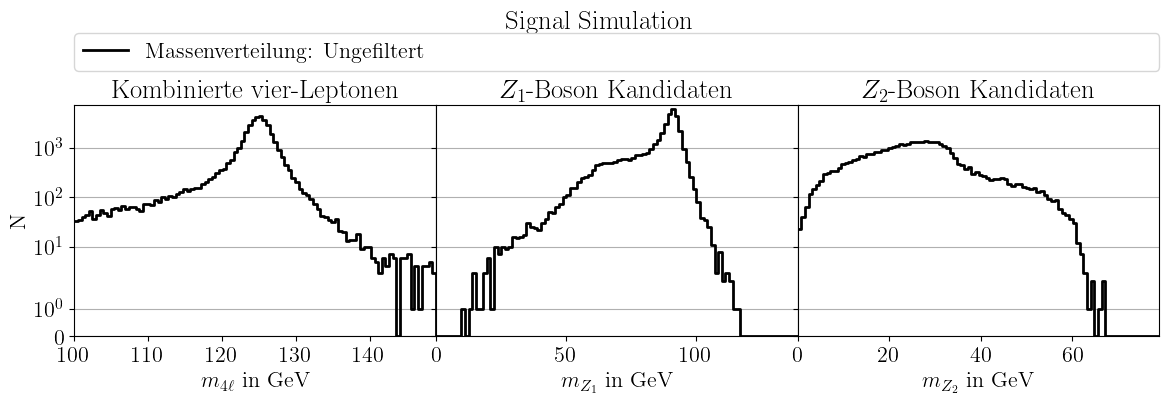

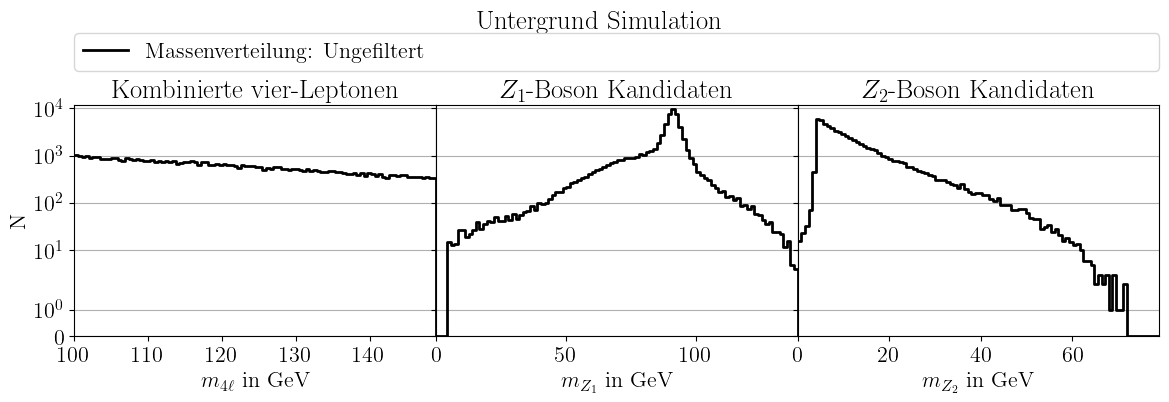

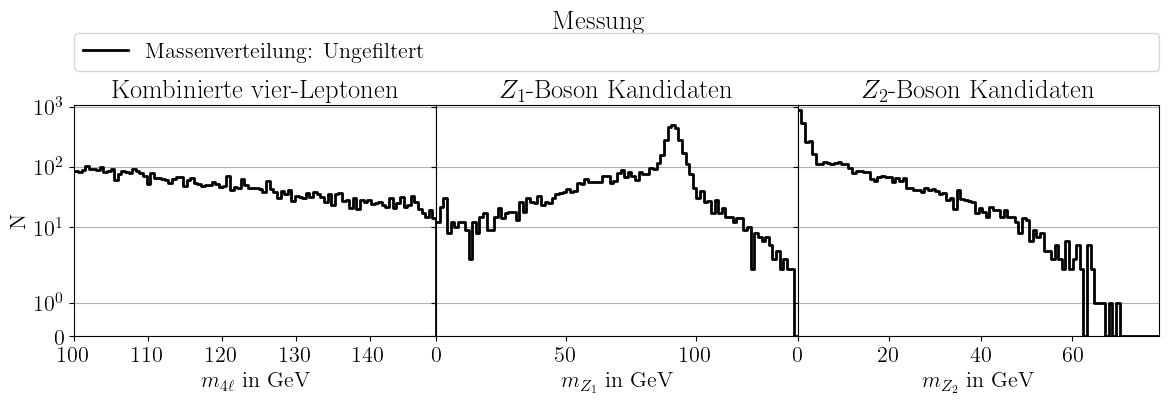

In [22]:
_ = dfs.pipe(clear_hist_plots).pipe(plot_masses, filter_name="Ungefiltert", title="Signal Simulation")
_ = dfb.pipe(clear_hist_plots).pipe(plot_masses, filter_name="Ungefiltert", title="Untergrund Simulation")
_ = dfm.pipe(clear_hist_plots).pipe(plot_masses, filter_name="Ungefiltert", title="Messung")

Nun werden wir das Ziel verfolgen, die Datensätze so zu bereinigen, dass im besten Fall eine Resonanz von einem möglichen Higgs-Boson in den gemessenen Daten sichtbar wird. Dieser gesamte Prozess soll anhand der simulierten Ereignisse durchgeführt werden, um keine Vorurteile in die Analyse einzubringen. Normalerweise werden die Messdaten auch nicht direkt betrachtet, wie es oben gemacht wurde, zumindest nicht solange die Analyse wie wir sie hier skizzieren werden, fertiggestellt wurde. Aus pädagogischen Gründen ist es jedoch sinnvoll, zu erklären, warum die folgende Datenaufbereitung in Form von angewendeten Filtern durchgeführt werden sollte.

Die Motivation für einzelne Filter, insbesondere für den Filter der relativen Isolation, wird an der Tafel erläutert, ebenso wie ein sinnvoller Ansatz für die Wahl der Intervallgrenzen der Z-Boson Massen. Dazu später mehr.


Die Anwendung einzelner Filter erfolgt über `dataframe.pipe(Filtername, Filterargumente).pipe(Filtername, Filterargumente) ...`.

Die folgenden Filter stehen zur Verfügung:

- `Filter.min_pt_of_lepton` mit `min_pt_electron` und `min_pt_muon` als erforderliche Argumente
- `Filter.relative_isolation_of_lepton`, mit dem erforderlichen Argument `relative_isolation_value`
- `Filter.min_lepton_number` ist ein argumentloser Filter, ebenso wie
- `Filter.neutral_charge`, der nach jedem Einsatz anderer Filter angewendet werden sollte, da diese alle Ereignisse entfernen, in denen aufgrund der Anwendung anderer Filter nicht mehr vier Leptonen vorhanden sind oder keine elektrisch neutrale Ladungskombination mehr existiert, für den fall von mehr als vier Leptonen (betrifft uns weniger).
- `Filter.z_masses` mit den begrenzenden Werten `z1_mass_min`, `z1_mass_max`, `z2_mass_min` und `z2_mass_max`

Alle festgelegten Werte können immer einzeln angegeben werden oder in einer gemeinsamen Sammlung gespeichert werden, um einen einfachen Zugriff darauf zu ermöglichen. Sobald ein Wert festgelegt ist, überschreibt dieser den Standardwert.


In [23]:
filter_arguments = {
    "min_pt_electron": 0,
    "min_pt_muon": 0,
    "relative_isolation_value": 9999,
    "z1_mass_min": 0,
    "z2_mass_min": 0,
    "z1_mass_max": 9999,
    "z2_mass_max": 9999,
}

Die Anzahl der Ereignisse, die in einem Schritt herausgefiltert werden können, kann mit Hilfe der beiden folgenden Hilfsfunktionen ermittelt werden. Bevor ein Filter angewendet wird, wird die Anzahl der Ereignisse, die derzeit im Datensatz vorhanden sind, mit `.pipe(set_n_events)` zwischengespeichert. Nachdem die Filter angewendet wurden, kann mit `.pipe(print_n_events_change)` die Änderung der Anzahl der Ereignisse vor und nach der Filterung angezeigt werden.

In [24]:
N_EVENTS = None  # Globale Variable, die die Anzahl der Events speichert
# Funktion, die die Anzahl der Events setzt
def set_n_events(df):  # der Datensatz wird als Parameter übergeben und unverändert zurückgegeben
    global N_EVENTS  # Zugrif auf die globale Variable
    N_EVENTS = df.shape[0]  # Anzahl der Zeilen (Ereignisse) des Datensatzes werden gespeichert
    return df

# Funktion, die die das Verhältnis der Events (nachher/vorher) ausgibt
def print_n_events_change(
    df,  # Datensatz 
    filter_name="", # optionaler Name des Filters /der Filter welche nach "set_n_events" angewendet wurden
    reset=True,  # optionaler Parameter, der die Anzahl der Events zurücksetzt für die nächste Anwendung
):
    global N_EVENTS  # Zugrif auf die globale Variable
    n_events_new = df.shape[0] # Anzahl der Zeilen (Ereignisse) des Datensatzes werden gespeichert
    relative_change = 100 * (1 - n_events_new / N_EVENTS)  # Berechnung der relativen Änderung
    print(f"Filer: {filter_name}; Number of events: {N_EVENTS} -> {n_events_new}; Relative change: -{round(relative_change, 2)}%")
    if reset:
        N_EVENTS = None  # Zurücksetzen der globalen Variable, muss über set_n_events wieder gesetzt werden.
    return df

Als Beispiel: wenden wir den Filter an, der alle Leptonen entfernt, die unter einem festgelegten minimalen Wert vom Transversalimpuls liegen. Im Falle, wenn der Transversalimpuls noch nicht besprochen wurde: 

Der Impuls eines Teilchens beschreibt, wie schnell sich das Teilchen bewegt. Er hat sowohl eine Größe als auch eine Richtung. Allerdings ist es bei Kollisions-Experimenten, bei denen Teilchen mit hoher Geschwindigkeit aufeinandertreffen, oft sinnvoller, den Impuls in zwei Komponenten aufzuteilen: eine entlang der Bewegungsrichtung der Teilchen (Longitudinalimpuls), in unserem Fall `"pz"` und eine senkrecht dazu (Transversalimpuls).

Der Transversalimpuls ist also der Teil des Impulses, der senkrecht zur Bewegungsrichtung liegt. Berechnet wird er über $\sqrt{p_x^2 + p_y^2}$. Im Kontext von Kollisions-Experimenten ist der Transversalimpuls besonders nützlich, um herauszufinden, wie viel Energie in Form von Bewegung senkrecht zur Kollisionsachse auftritt.

{'min_pt_electron': 7,
 'min_pt_muon': 5,
 'relative_isolation_value': 9999,
 'z1_mass_max': 9999,
 'z1_mass_min': 0,
 'z2_mass_max': 9999,
 'z2_mass_min': 0}


Filer: min_pt_of_lepton; Number of events: 66192 -> 37085; Relative change: -43.97%


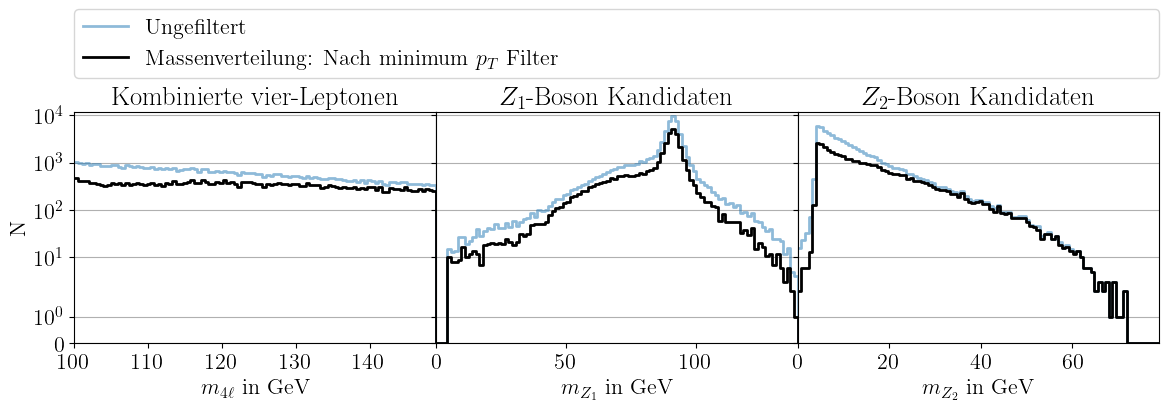

Filer: min_pt_of_lepton; Number of events: 39935 -> 34387; Relative change: -13.89%


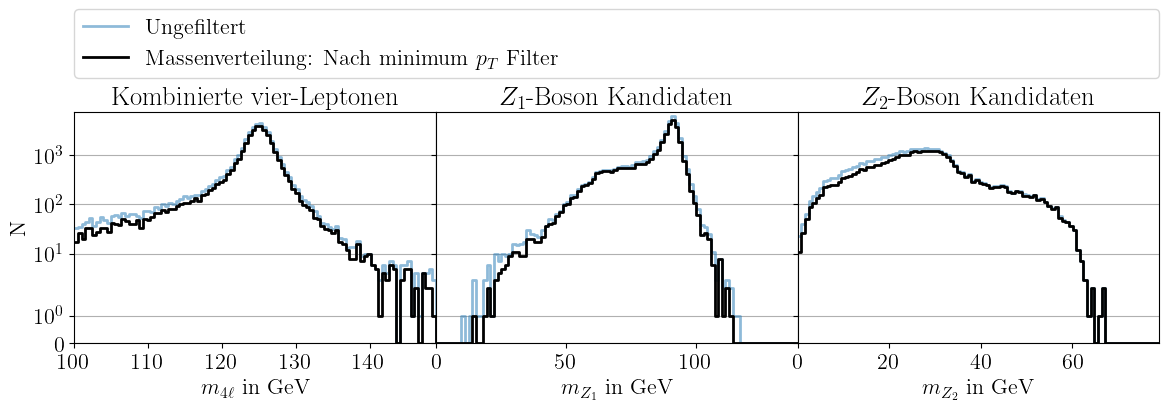

In [25]:
filter_arguments["min_pt_electron"] = 7  # Mindest-Transversalimpuls eines Elektrons in GeV
filter_arguments["min_pt_muon"] = 5  # Mindest-Transversalimpuls eines Myons in GeV

pprint(filter_arguments)  # Zur Information

_ = (
    # Wahl des Datensatzes. Hier: Untergrund-Simulation
    dfb
        .pipe(clear_hist_plots)  # Setze die vorherige Historie zurück
        .pipe(set_n_events)  # Setze die Anzahl der Ereignisse
        # Die Histogramme werden gespeichert aber nicht angezeigt, wenn show_plot=False gesetzt wird
        .pipe(plot_masses, filter_name="Ungefiltert", show_plot=False)
        # Anwendung der ausgewählten Filter mit den gewähten Parametern
        .pipe(Filter.min_pt_of_lepton, min_pt_electron=filter_arguments["min_pt_electron"], min_pt_muon=filter_arguments["min_pt_muon"])
        # Entferne Ereignisse, bei denen die Rekonstruktion des Higgs-Bosons nicht mehr möglich ist
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        .pipe(print_n_events_change, filter_name="min_pt_of_lepton")  # Ausgabe der Anzahl der gefilterten Ereignisse
        .pipe(plot_masses, filter_name="Nach minimum $p_T$ Filter")  # Visualisierung der Histogramme von den invarianten Massen
)

_ = (
    # Nun analog für den Datensatz mit dem simulierten Signal
    dfs
        .pipe(clear_hist_plots)  # Setze die vorherige Historie zurück
        .pipe(set_n_events)  # Setze die Anzahl der Ereignisse
        # Die Histogramme werden gespeichert aber nicht angezeigt, wenn show_plot=False gesetzt wird
        .pipe(plot_masses, filter_name="Ungefiltert", show_plot=False)
        # Anwendung der ausgewählten Filter mit den gewähten Parametern
        .pipe(Filter.min_pt_of_lepton, min_pt_electron=filter_arguments["min_pt_electron"], min_pt_muon=filter_arguments["min_pt_muon"])
        # Entferne Ereignisse, bei denen die Rekonstruktion des Higgs-Bosons nicht mehr möglich ist
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        .pipe(print_n_events_change, filter_name="min_pt_of_lepton")  # Ausgabe der Anzahl der gefilterten Ereignisse
        .pipe(plot_masses, filter_name="Nach minimum $p_T$ Filter")  # Visualisierung der Histogramme von den invarianten Massen
)

Das Hauptziel besteht darin, den Untergrund so weit wie möglich zu reduzieren, während das Signal bestmöglich erhalten bleibt. Dabei kann es generell dazu kommen, dass die begrenzte Größe des Messdatensatzes die Freiheit bei der Auswahl der spezifischen Filtergrenzen einschränkt. Die besten Filterergebnisse bei den simulierten Datensätzen sind nur begrenzt nützlich, wenn in der tatsächlichen Messung kaum noch Ereignisse vorhanden sind. Deshalb sollten die jeweiligen Filtergrenzen nicht zu extrem gewählt werden. 

Die Wahl der Filtergrenzen wird zusammen mit den Betreuern für die Aufgabe motiviert.

Ein Beispiel ist der oben angewendete Filter für den minimalen Transversalimpuls. Er zeigt, dass die Reduzierung der vier-Leptonen-invarianten Massenverteilung für den simulierten Untergrund größer ist im Vergleich zum Signal. Es ist möglich, dass weitere Filter größere Effekte zeigen als der Filter für den minimalen Transversalimpuls. Die Idee hinter diesem Filter besteht hauptsächlich darin, alle Leptonen zu entfernen, die potenziell fälschlicherweise als solche klassifiziert wurden. Die Unterscheidung in Elektronen und Myonen erfolgt lediglich, weil die Myonen im Detektor besser erkannt werden können. Daher haben sie einen geringeren minimalen Wert für den Transversalimpuls. Die gewählten Werte entsprechen den minimalen Transversalimpulsen, die vom CMS Experiment festgelegt wurden. Es ist aber möglich, größere Werte nach Wunsch selbstständig zu wählen.

<div class="alert alert-info">
    Welchen Massenbereich der vier-Leptonen-invarianten Masse spricht der Filter besser an? Du kannst hierzu unterschiedliche und sogar extreme Werte ausprobieren.
    Ab welchen Werten werden die meisten simulierten Ereignisse aus den Verteilungen herausgefiltert?
    Gibt es eine Kombination von Werten, bei der mehr Signalereignisse als Untergrundereignisse entfernt werden?
</div>

Nachdem Du diese Fragen beantwortet hast (für Dich oder im Dialog), solltest Du die Wahl der Filtergrenzen abschließend treffen und nicht mehr ändern. Sie werden und später endgültig auf die Datensätze, einschließlich der tatsächlichen Messung, angewendet. Es kann helfen, eine Kopie dieses Datensatzes zu erstellen um beim Ausprobieren nicht immer alle vorherigen Schritte machen zu müssen. Wenn die Datensätze groß sind, kann es vorkommen, dass eine solche Kopie RAM belegt, der nicht zur Verfügung steht. In diesem Fall muss eine andere Lösung gefunden werden. Für das Vorgehen hier reicht es, die Filter immer wieder anzuwenden und erst zum Schluss die Datensätze abzuspeichern, da der Filterschritt schnell genug abläuft.

---

Der nächste Filter, den Du verwenden kannst, ist der Filter für die relative Isolation von einzelnen Leptonen. Die relative Isolation als Filterkriterium wird genutzt, um Leptonen mit hohem Impuls herauszufiltern, die aus Quark- oder Gluonen-Jets stammen könnten. 

> Was sind Quarks, was sind Gluonen... und was sind Jets?

Die Isolation gibt das Verhältnis zwischen der Summe der transversalen Impulse von Teilchen in der Nähe des betrachteten Leptons und dem transversalen Impuls des jeweiligen Leptons an.

Die relative Isolation ist ein ausgezeichnetes Filterkriterium, da sie es ermöglicht, Ereignisse mit isolierten Leptonen, die meist aus schwachen Zerfällen stammen, von Ereignissen mit nicht isolierten Leptonen (meist starke Wechselwirkung) zu unterscheiden. Da die relative Isolation ein Verhältnis ist, bleibt sie unabhängig von der Energie des Leptons und kann auf verschiedenen Energieskalen angewendet werden. Dies macht die relative Isolation zu einem vielseitigen Werkzeug, wenn das Ziel eine Anreicherung des Signals ist.

Eine mögliche bildliche Darstellung wird an der Tafel erläutert.

<div class="alert alert-info">
    Wende den Filter für die relative Isolation auf die Signal- und Untergrund-Simulation an, beginnend mit einem Wert von 0,35.
    Wende auch in derselben Abfolge die bisherigen Filter an, einschließlich des Filters für den minimalen Transversalimpuls.
    Macht es einen Unterschied, in welcher Reihenfolge du die Filter für den Transversalimpuls und die relative Isolation anwendest?
    Welcher der beiden Datensätze wird stärker reduziert, wenn beide Filter angewendet werden?
    Finde einen Wert für die relative Isolation (der 0,3 nicht unterschreiten sollte, da sonst ein großer Anteil der Messdaten verworfen wird).
</div>


{'min_pt_electron': 7,
 'min_pt_muon': 5,
 'relative_isolation_value': 0.35,
 'z1_mass_max': 9999,
 'z1_mass_min': 0,
 'z2_mass_max': 9999,
 'z2_mass_min': 0}
Filer: min_pt_of_lepton; Number of events: 66192 -> 37085; Relative change: -43.97%
Filer: relative_isolation_of_lepton; Number of events: 37085 -> 21333; Relative change: -42.48%


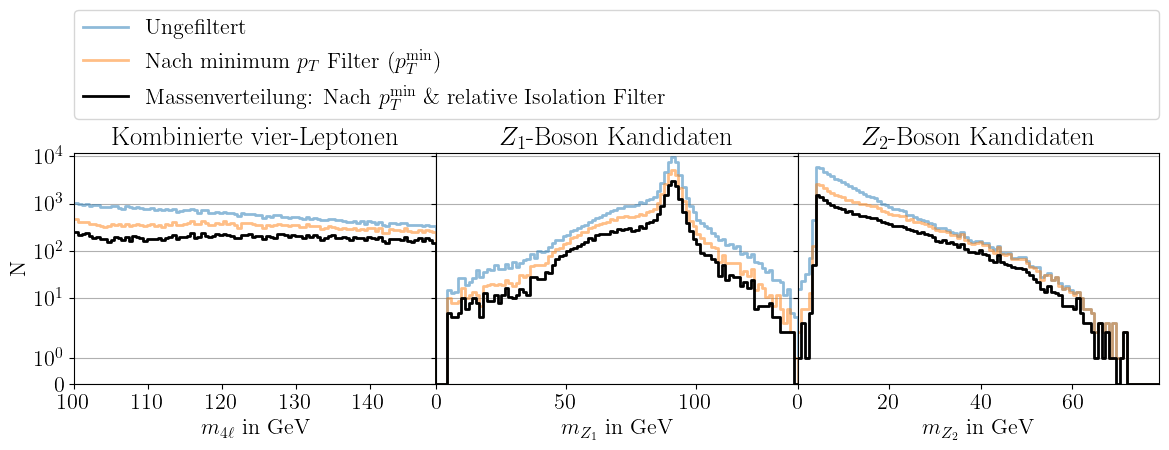

Filer: relative_isolation_of_lepton; Number of events: 39935 -> 22989; Relative change: -42.43%
Filer: min_pt_of_lepton; Number of events: 22989 -> 21380; Relative change: -7.0%


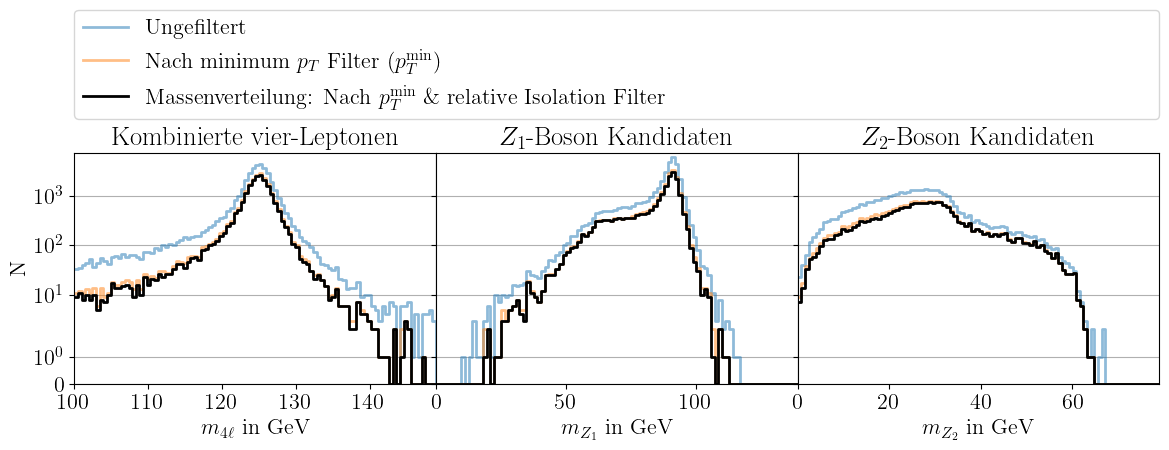

In [26]:
filter_arguments["relative_isolation_value"] = 0.35

pprint(filter_arguments)

_ = (
    dfb
        .pipe(clear_hist_plots)
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name="Ungefiltert", show_plot=False)
        # ---
        .pipe(Filter.min_pt_of_lepton, min_pt_electron=filter_arguments["min_pt_electron"], min_pt_muon=filter_arguments["min_pt_muon"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="min_pt_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name=r"Nach minimum $p_T$ Filter ($p_T^{\mathrm{min}}$)", show_plot=False)
        # ---
        .pipe(Filter.relative_isolation_of_lepton, relative_isolation_value=filter_arguments["relative_isolation_value"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="relative_isolation_of_lepton")
        # ---
        .pipe(plot_masses, filter_name=r"Nach $p_T^{\mathrm{min}}$ \& relative Isolation Filter")
)

_ = (
    dfs
        .pipe(clear_hist_plots)
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name="Ungefiltert", show_plot=False)
        # ---
        .pipe(Filter.relative_isolation_of_lepton, relative_isolation_value=filter_arguments["relative_isolation_value"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="relative_isolation_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name=r"Nach minimum $p_T$ Filter ($p_T^{\mathrm{min}}$)", show_plot=False)
        # ---
        .pipe(Filter.min_pt_of_lepton, min_pt_electron=filter_arguments["min_pt_electron"], min_pt_muon=filter_arguments["min_pt_muon"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="min_pt_of_lepton")
        # ---
        .pipe(plot_masses, filter_name=r"Nach $p_T^{\mathrm{min}}$ \& relative Isolation Filter")
)

---

Zum Abschluss kann ein Filter auf die Massen der beiden Z-Bosonen angewendet werden. Dieser Filter macht sich zunutze, dass das Z-Boson eine Resonanz bei einer Masse von $91\,\mathrm{GeV}/c^2$ aufweist. Durch die Anwendung des Filters auf die Masse des $Z_1$-Boson-Kandidaten gehen wir davon aus, dass das gefundene Z-Boson in der Nähe dieser Resonanz liegt. Wenn das Higgs-Boson in zwei Z-Bosonen zerfällt, wird erwartet, dass das zweite Z-Boson eine geringere invariante Masse als $91\,\mathrm{GeV}/c^2$ hat, um zusammen eine invariante Masse im Bereich von $125\,\mathrm{GeV}/c^2$ zu ergeben. Der Filter auf die Masse des $Z_2$-Bosons kann entsprechend eingestellt werden, um diesen Bereich zu berücksichtigen. Dadurch werden insbesondere Ereignisse unterdrückt, bei denen zwei reale Z-Bosonen entstehen, sowie Ereignisse mit zwei virtuellen Z-Bosonen. Dies führt zu einer stärkeren Reduzierung des Untergrunds im Vergleich zum Signal.

<div class="alert alert-info">
    Wähle passende Werte für die minimalen und maximalen Massen der $Z_1$- und $Z_2$-Bosonen aus. Das Fenster für die $Z_1$-Bosonen-Masse könnte etwa $60\,\mathrm{GeV}/c^2$ um die nominale Z-Boson-Masse betragen.
    Wende diesen Filter auf die Signal- und Untergrundsimulation einzeln und in Kombination mit den vorherigen Filtern an (Da dieser Filter nicht einzelne Leptonen herausfiltert, ist ein anschließendes Anwenden der `min_lepton_number` und `neutral_charge` Filter nicht notwendig).
    Entfernt dieser Filter tatsächlich die Untergrundereignisse, ohne die Signalereignisse zu beeinträchtigen?
</div>


{'min_pt_electron': 7,
 'min_pt_muon': 5,
 'relative_isolation_value': 0.35,
 'z1_mass_max': 120,
 'z1_mass_min': 40,
 'z2_mass_max': 60,
 'z2_mass_min': 12}
Filer: min_pt_of_lepton; Number of events: 66192 -> 37085; Relative change: -43.97%
Filer: relative_isolation_of_lepton; Number of events: 37085 -> 21333; Relative change: -42.48%
Filer: z_masses; Number of events: 21333 -> 11144; Relative change: -47.76%


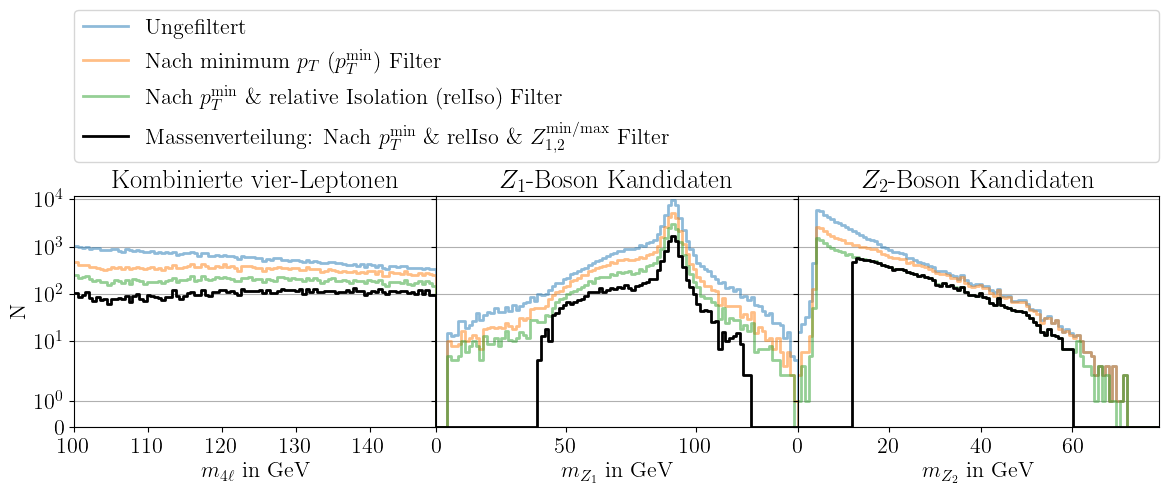

Filer: min_pt_of_lepton; Number of events: 39935 -> 34387; Relative change: -13.89%
Filer: relative_isolation_of_lepton; Number of events: 34387 -> 21380; Relative change: -37.83%
Filer: z_masses; Number of events: 21380 -> 19539; Relative change: -8.61%


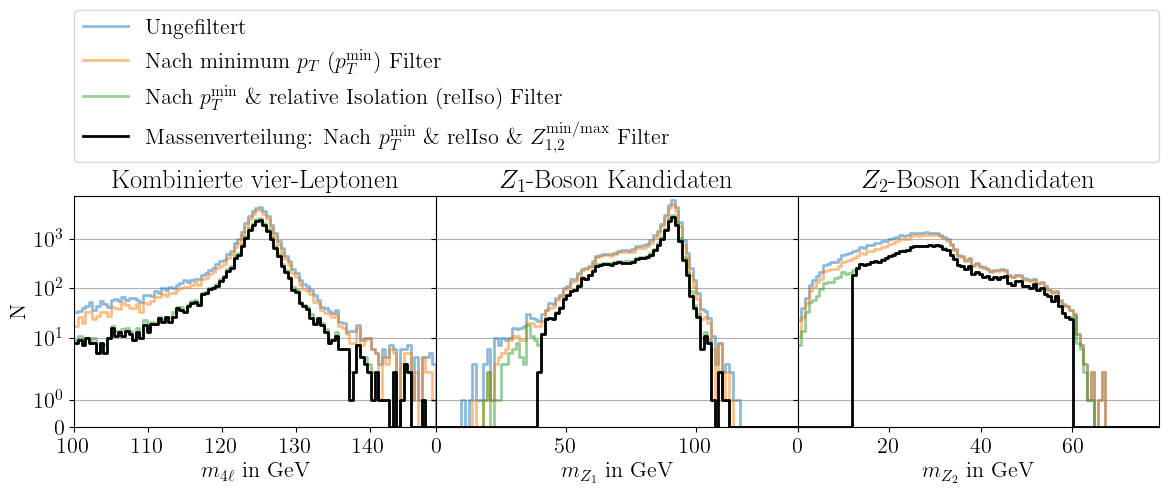

In [27]:
filter_arguments["z1_mass_min"] = 40 
filter_arguments["z1_mass_max"] = 120
filter_arguments["z2_mass_min"] = 12
filter_arguments["z2_mass_max"] = 60

pprint(filter_arguments)

_ = (
    dfb
        .pipe(clear_hist_plots)
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name="Ungefiltert", show_plot=False)
        # ---
        .pipe(Filter.min_pt_of_lepton, min_pt_electron=filter_arguments["min_pt_electron"], min_pt_muon=filter_arguments["min_pt_muon"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="min_pt_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name=r"Nach minimum $p_T$ ($p_T^{\mathrm{min}}$) Filter", show_plot=False)
        # ---
        .pipe(Filter.relative_isolation_of_lepton, relative_isolation_value=filter_arguments["relative_isolation_value"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="relative_isolation_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name=r"Nach $p_T^{\mathrm{min}}$ \& relative Isolation (relIso) Filter", show_plot=False)
        # ---
        .pipe(
            Filter.z_masses, 
            z1_mass_min=filter_arguments["z1_mass_min"], 
            z1_mass_max=filter_arguments["z1_mass_max"], 
            z2_mass_min=filter_arguments["z2_mass_min"], 
            z2_mass_max=filter_arguments["z2_mass_max"],
        )
        # ---
        .pipe(print_n_events_change, filter_name="z_masses")
        # ---
        .pipe(plot_masses, filter_name=r"Nach $p_T^{\mathrm{min}}$ \& relIso \& $Z_{1,2}^{\mathrm{min/max}}$ Filter")
)

_ = (
    dfs
        .pipe(clear_hist_plots)
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name="Ungefiltert", show_plot=False)
        # ---
        .pipe(Filter.min_pt_of_lepton, min_pt_electron=filter_arguments["min_pt_electron"], min_pt_muon=filter_arguments["min_pt_muon"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="min_pt_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name=r"Nach minimum $p_T$ ($p_T^{\mathrm{min}}$) Filter", show_plot=False)
        # ---
        .pipe(Filter.relative_isolation_of_lepton, relative_isolation_value=filter_arguments["relative_isolation_value"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="relative_isolation_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name=r"Nach $p_T^{\mathrm{min}}$ \& relative Isolation (relIso) Filter", show_plot=False)
        # ---
        .pipe(
            Filter.z_masses, 
            z1_mass_min=filter_arguments["z1_mass_min"], 
            z1_mass_max=filter_arguments["z1_mass_max"], 
            z2_mass_min=filter_arguments["z2_mass_min"], 
            z2_mass_max=filter_arguments["z2_mass_max"],
        )
        # ---
        .pipe(print_n_events_change, filter_name="z_masses")
        # ---
        .pipe(plot_masses, filter_name=r"Nach $p_T^{\mathrm{min}}$ \& relIso \& $Z_{1,2}^{\mathrm{min/max}}$ Filter")
)

Nach der Festlegung der Filtergrenzen sollten diese abschließend auf die Datensätze angewendet werden, einschließlich der tatsächlichen Messung.

Die Anwendung der implementierten Filter auf die simulierten Datensätze erfolgt wie zuvor beschrieben. Alle implementierten Filter sollten auf den Signal- und Untergrunddatensatz sowie auf die durchgeführte Messung (nächste Code-Zelle) angewendet werden. Falls einige Filter weggelassen oder zusätzliche Filter hinzugefügt wurden, können diese nach dem oben beschriebenen Muster auf die drei Datensätze angewendet werden.

In [28]:
print("Background simulation")
dfb_processed = (
    dfb
        .pipe(clear_hist_plots)
        .pipe(set_n_events)
        # ---
        .pipe(Filter.min_pt_of_lepton, min_pt_electron=filter_arguments["min_pt_electron"], min_pt_muon=filter_arguments["min_pt_muon"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="min_pt_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(Filter.relative_isolation_of_lepton, relative_isolation_value=filter_arguments["relative_isolation_value"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="relative_isolation_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(
            Filter.z_masses, 
            z1_mass_min=filter_arguments["z1_mass_min"], 
            z1_mass_max=filter_arguments["z1_mass_max"], 
            z2_mass_min=filter_arguments["z2_mass_min"], 
            z2_mass_max=filter_arguments["z2_mass_max"],
        )
        # ---
        .pipe(print_n_events_change, filter_name="z_masses")
        # ---
)

print("Signal simulation")
dfs_processed = (
    dfs
        .pipe(clear_hist_plots)
        .pipe(set_n_events)
        # ---
        .pipe(Filter.min_pt_of_lepton, min_pt_electron=filter_arguments["min_pt_electron"], min_pt_muon=filter_arguments["min_pt_muon"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="min_pt_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(Filter.relative_isolation_of_lepton, relative_isolation_value=filter_arguments["relative_isolation_value"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="relative_isolation_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(
            Filter.z_masses, 
            z1_mass_min=filter_arguments["z1_mass_min"], 
            z1_mass_max=filter_arguments["z1_mass_max"], 
            z2_mass_min=filter_arguments["z2_mass_min"], 
            z2_mass_max=filter_arguments["z2_mass_max"],
        )
        # ---
        .pipe(print_n_events_change, filter_name="z_masses")
        # ---
)

Background simulation
Filer: min_pt_of_lepton; Number of events: 66192 -> 37085; Relative change: -43.97%
Filer: relative_isolation_of_lepton; Number of events: 37085 -> 21333; Relative change: -42.48%
Filer: z_masses; Number of events: 21333 -> 11144; Relative change: -47.76%
Signal simulation
Filer: min_pt_of_lepton; Number of events: 39935 -> 34387; Relative change: -13.89%
Filer: relative_isolation_of_lepton; Number of events: 34387 -> 21380; Relative change: -37.83%
Filer: z_masses; Number of events: 21380 -> 19539; Relative change: -8.61%


Nachdem alle Filter auf die simulierten Datensätze angewendet wurden, ist es nun an der Zeit, die gleichen Filter auf die tatsächliche Messung anzuwenden. Für die Darstellung der Effekte der einzelnen Filterschritte verwenden wir eine leicht modifizierte Darstellung. Dabei teilen wir die y-Achse in zwei Bereiche auf. Der untere Bereich hat eine lineare Skala von 0 bis zu einem bestimmten Wert, den wir als`yedge` bezeichnen. Der obere Bereich der y-Achse hat eine logarithmische Skala, die bei `yedge` beginnt. Wir wählen diese Darstellung, weil die Filter auf den Messdaten einen viel stärkeren Effekt haben können (und werden) und schnell viele Größenordnungen an Ereignissen herausfiltern. Die logarithmische Skala eignet sich gut, wie bereits zuvor gezeigt. Wenn allerdings nur wenige Ereignisse vorhanden sind, kann eine lineare Skala zur besseren Darstellung verwendet werden. Wenn dies nicht gewünscht ist, kann der Eintrag `"yedge": None` im `plotting_dict` gesetzt werden.

{'min_pt_electron': 7,
 'min_pt_muon': 5,
 'relative_isolation_value': 0.35,
 'z1_mass_max': 120,
 'z1_mass_min': 40,
 'z2_mass_max': 60,
 'z2_mass_min': 12}


Filer: min_pt_of_lepton; Number of events: 5337 -> 1354; Relative change: -74.63%
Filer: relative_isolation_of_lepton; Number of events: 1354 -> 47; Relative change: -96.53%
Filer: z_masses; Number of events: 47 -> 18; Relative change: -61.7%


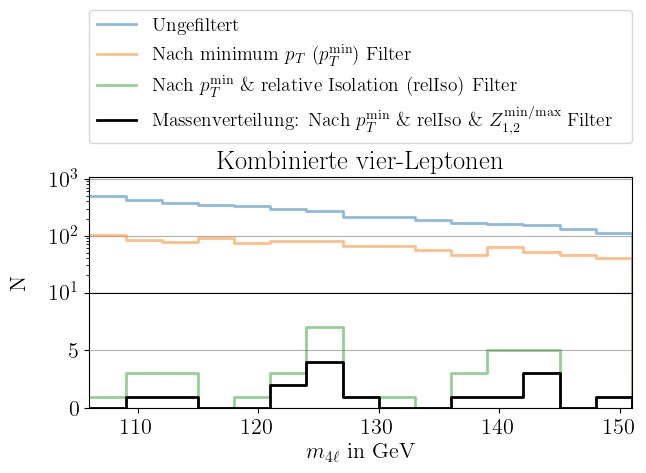

In [29]:
plotting_dict = {"four_lep_bins": 15, "four_lep_range": (106, 151), "show_z1_and_z2_mass": False, "xdim": 7, "yedge": 9.9} 

pprint(filter_arguments)

dfm_processed = (
    dfm
        .pipe(clear_hist_plots)
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name="Ungefiltert", show_plot=False, **plotting_dict)
        # ---
        .pipe(Filter.min_pt_of_lepton, min_pt_electron=filter_arguments["min_pt_electron"], min_pt_muon=filter_arguments["min_pt_muon"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="min_pt_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name=r"Nach minimum $p_T$ ($p_T^{\mathrm{min}}$) Filter", show_plot=False, **plotting_dict)
        # ---
        .pipe(Filter.relative_isolation_of_lepton, relative_isolation_value=filter_arguments["relative_isolation_value"])
        .pipe(Filter.min_lepton_number)
        .pipe(Filter.neutral_charge)
        # ---
        .pipe(print_n_events_change, filter_name="relative_isolation_of_lepton")
        .pipe(set_n_events)
        # ---
        .pipe(plot_masses, filter_name=r"Nach $p_T^{\mathrm{min}}$ \& relative Isolation (relIso) Filter", show_plot=False, **plotting_dict)
        # ---
        .pipe(
            Filter.z_masses, 
            z1_mass_min=filter_arguments["z1_mass_min"], 
            z1_mass_max=filter_arguments["z1_mass_max"], 
            z2_mass_min=filter_arguments["z2_mass_min"], 
            z2_mass_max=filter_arguments["z2_mass_max"],
        )
        # ---
        .pipe(print_n_events_change, filter_name="z_masses")
        # ---
        .pipe(plot_masses, filter_name=r"Nach $p_T^{\mathrm{min}}$ \& relIso \& $Z_{1,2}^{\mathrm{min/max}}$ Filter", **plotting_dict)
)

Mit der Anwendung der ausgewählten Filter wurde die Anzahl der verfügbaren Ereignisse von mehreren Tausend auf nur wenige reduziert. Wenn du den Vergleich der Verteilungen erneut durchführst, wirst du feststellen, dass sich die simulierten Ereignisse, sowohl das Signal als auch der Untergrund, kaum verändert haben. Die Reduktion der Ereignisse hat kaum Auswirkungen auf die Form der Verteilungen. Ganz anders verhält es sich jedoch bei dem gemessenen Datensatz. Vor der Anwendung der Filter ähnelte die Verteilung eher dem simulierten Untergrund. Nach der Anwendung der Filter ist diese Ähnlichkeit nicht mehr so eindeutig gegeben.

---

Kommen wir nun zum Vergleich zwischen den simulierten Datensätzen, die wir erwarten und der durchgeführten Messung. Die Idee hierbei ist, dass die simulierten Datensätze an die Luminosität (dem Datenumfang der Messung) und dem jeweiligen Zerfallskanal (vier Myonen, vier Elektronen oder zwei Elektronen und zwei Myonen) angepasst werden. Dies geschieht durch eine Skalierung der Histogramme, da die simulierten Datensätze in der Regel wesentlich mehr Ereignisse enthalten, um eine bessere Beschreibung der erwarteten Ergebnisse zu ermöglichen. Die Durchführung dieser Skalierung ist zwar nicht kompliziert, aber ich habe diese Aufgabe für Dich erledigt, da sie weniger spannend ist. Du findest die Hilfsfunktion "plot_mc_data_comparison" ebenfalls in der Datei mit den Hilfsfunktionen.

Die Darstellung erfolgt mithilfe der Hilfsfunktion `plot_mc_data_comparison`, die in der Datei mit den Hilfsfunktionen enthalten ist. Diese Funktion zeigt nicht nur die Grafik an, sondern liefert auch die Einträge der Histogramme des erwarteten Untergrunds aus der Simulation und der tatsächlichen Messung. Die Einträge des Histogramms für das erwartete Signal werden nicht zurückgegeben, da die nächste Aufgabe darin besteht festzustellen, ob das beobachtete Signal überhaupt signifikant ist. Daher wird zur Bestimmung der Anzahl der beobachteten Signalereignisse die Differenz zwischen der durchgeführten Messung und dem erwarteten Untergrund berechnet. Die Verwendung der Untergrunderwartung an dieser Stelle ist im Gegensatz zur Signalerwartung möglich, da der Untergrund bereits in anderen Experimenten bestätigt wurde.

<div class="alert alert-info">
    An welcher Stelle gibt es Überschüsse gegenüber dem erwarteten Untergrund?
    Sind alle Überschüsse im Rahmen ihrer Unsicherheit noch mit dem erwarteten Untergrund vereinbar? Wie wird diese Unsicherheit bestimmt?
</div>

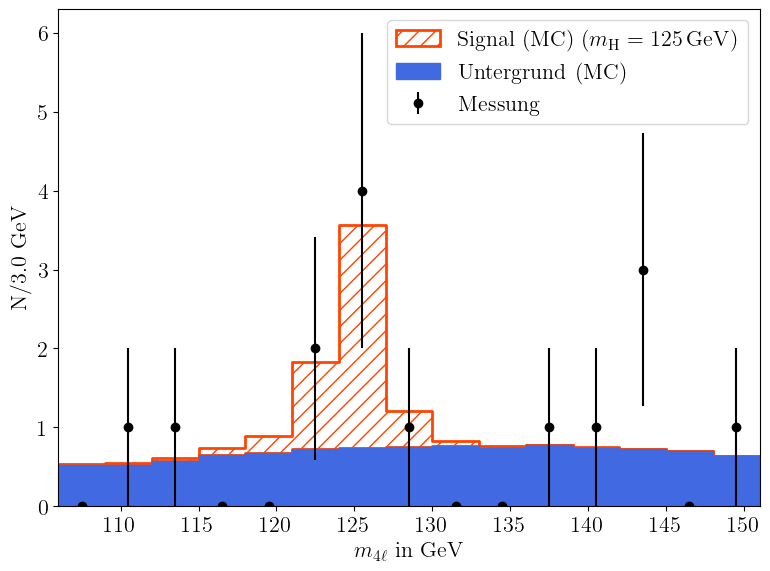

In [30]:
from utils import plot_mc_data_comparison
bkg_sim_bins, data_bins = plot_mc_data_comparison(dfm_processed, dfs_processed, dfb_processed)

Die Beurteilung, ob die beobachtete Überhöhung, die durch die Signalerwartung erklärt werden kann, überhaupt signifikant ist und ob sie tatsächlich auf ein Higgs-artiges Boson mit einer Masse von $125\,\mathrm{GeV}/c^2$ zurückzuführen ist, stellt den letzten Teil des Notebooks dar. Die Frage nach der Signifikanz ist in der Teilchenphysik von zentraler Bedeutung und muss beantwortet werden, wenn beispielsweise neue Teilchen oder Prozesse beobachtet werden oder ob diese nicht auch durch die Fluktuation des Untergrundes erklärt werden können. Eine Abschätzung der Signifikanz kann als die Abweichung der beobachteten Messung vom erwarteten Untergrund in Einheiten der Standardabweichung angegeben werden. Der Grundgedanke ist, dass eine große Abweichung der Messung vom erwarteten Untergrund signifikanter ist als eine kleine Abweichung.

Eine grobe Schätzung für die Signifikanz kann durch die Formel $Z = \frac{s}{\sqrt{b}}$ berechnet werden. Hierbei steht $s$ für die Anzahl der beobachteten Signalereignisse und $b$ für die Anzahl der erwarteten Untergrundereignisse. Entsprechend ist $\sqrt{b}$ die Unsicherheit auf den Untergrund, da es sich um einen Poisson-Prozess handelt. Wie oben beschrieben, wird die Anzahl der Signalereignisse über die Differenz zwischen der Anzahl der beobachteten Ereignisse und dem erwarteten Untergrund bestimmt. Wenn der erwartete Untergrund sehr hoch ist, wird die Beobachtung einer signifikanten Abweichung schwieriger sein als bei einem geringeren Untergrund, da die Unsicherheit auf den Untergrund dominieren wird und das Verhältnis klein wird. Wie in der obigen Darstellung zu sehen ist, kann der Signalprozess jedoch deutlich vom Untergrund unterschieden werden. Dies ist der Vorteil des $\mathrm{H}\rightarrow ZZ\rightarrow 4\ell$ Zerfallskanals. Trotz seiner geringen Wahrscheinlichkeit im Vergleich zu anderen Zerfallskanälen hat dieser Kanal eine wichtige Rolle bei der Entdeckung des Higgs-Bosons gespielt.

In der Teilchenphysik gilt eine Signifikanz von $3\sigma$ als Hinweis auf einen möglichen neuen Prozess oder Teilchen, während ab $5\sigma$ von einer Entdeckung gesprochen wird. Bei der Entdeckung des Higgs-Bosons wurden für das Erreichen der $5\sigma$-Grenze mehrere Zerfallskanäle kombiniert.

<div class="alert alert-info">
    Ist der beobachtete Überschuss in der Messung, der durch ein Higgs-Boson von Masse $125\,\mathrm{GeV}/c^2$ erklärt werden kann, signifikant?
    Wie groß ist diese Signifikanz? Kann hier schon von einer Entdeckung gesprochen werden?
    Wie kann die Signifikanz verbessert werden?
    Spielt die Wahl der Grenzen des Histogramms und der Anzahl der Bins eine Rolle bei der Bestimmung der Signifikanz, wie sie oben definiert ist?
</div>

Die Fragen können ebenfalls in eine weiterführende Diskussion übergeführt werden, zum Beispiel woher die obige Abschätzformel überhaupt kommt und ob es nicht eine bessere gibt...

In [31]:
print("Histogrammierte Messung:")
pprint(data_bins)
print("Histogrammierte simulierte Untergrunderwartung:") 
pprint(bkg_sim_bins)

Histogrammierte Messung:
array([0, 1, 1, 0, 0, 2, 4, 1, 0, 0, 1, 1, 3, 0, 1])
Histogrammierte simulierte Untergrunderwartung:
array([0.52215599, 0.52174431, 0.57041841, 0.65508337, 0.67756771,
       0.72105273, 0.74180687, 0.74963119, 0.76387909, 0.7447718 ,
       0.77582078, 0.74378331, 0.72031134, 0.69560375, 0.63655241])


In [34]:
selected_bins = [5, 6, 7]
summed_data = data_bins[selected_bins].sum()
summed_bkg_sim = bkg_sim_bins[selected_bins].sum()
estimated_significance = (summed_data - summed_bkg_sim) / np.sqrt(summed_bkg_sim)
print(f"Estimated significance: {round(estimated_significance, 2)}σ")

Estimated significance: 3.22σ
